In [3174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Read the data

In [3175]:
data = pd.read_csv('day.csv')
data.head(20)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0         1  01-01-2018       1   0     1        0        1           1   
1         2  02-01-2018       1   0     1        0        2           1   
2         3  03-01-2018       1   0     1        0        3           1   
3         4  04-01-2018       1   0     1        0        4           1   
4         5  05-01-2018       1   0     1        0        5           1   
5         6  06-01-2018       1   0     1        0        6           0   
6         7  07-01-2018       1   0     1        0        0           0   
7         8  08-01-2018       1   0     1        0        1           1   
8         9  09-01-2018       1   0     1        0        2           1   
9        10  10-01-2018       1   0     1        0        3           1   
10       11  11-01-2018       1   0     1        0        4           1   
11       12  12-01-2018       1   0     1        0        5           1   
12       13  13-01-2018       1   0     1        0        6           0   
13       14  14-01-2018       1   0     1        0        0           0   
14       15  15-01-2018       1   0     1        0        1           1   
15       16  16-01-2018       1   0     1        0        2           1   
16       17  17-01-2018       1   0     1        1        3           0   
17       18  18-01-2018       1   0     1        0        4           1   
18       19  19-01-2018       1   0     1        0        5           1   
19       20  20-01-2018       1   0     1        0        6           0   

    weathersit       temp     atemp      hum  windspeed  casual  registered  \
0            2  14.110847  18.18125  80.5833  10.749882     331         654   
1            2  14.902598  17.68695  69.6087  16.652113     131         670   
2            1   8.050924   9.47025  43.7273  16.636703     120        1229   
3            1   8.200000  10.60610  59.0435  10.739832     108        1454   
4            1   9.305237  11.46350  43.6957  12.522300      82        1518   
5            1   8.378268  11.66045  51.8261   6.000868      88        1518   
6            2   8.057402  10.44195  49.8696  11.304642     148        1362   
7            2   6.765000   8.11270  53.5833  17.875868      68         891   
8            1   5.671653   5.80875  43.4167  24.250650      54         768   
9            1   6.184153   7.54440  48.2917  14.958889      41        1280   
10           2   6.932731   9.57320  68.6364   8.182844      43        1220   
11           1   7.081807   8.02365  59.9545  20.410009      25        1137   
12           1   6.765000   7.54415  47.0417  20.167000      38        1368   
13           1   6.595670   9.42065  53.7826   8.478716      54        1367   
14           2   9.566653  12.40560  49.8750  10.583521     222        1026   
15           1   9.498347  11.71085  48.3750  12.625011     251         953   
16           2   7.209153   8.83855  53.7500  12.999139     117         883   
17           2   8.883347  11.61665  86.1667   9.833925       9         674   
18           2  11.979134  14.92110  74.1739  13.957239      78        1572   
19           2  10.728347  12.75250  53.8333  13.125568      83        1844   

     cnt  
0    985  
1    801  
2   1349  
3   1562  
4   1600  
5   1606  
6   1510  
7    959  
8    822  
9   1321  
10  1263  
11  1162  
12  1406  
13  1421  
14  1248  
15  1204  
16  1000  
17   683  
18  1650  
19  1927

In [3176]:
data.shape

(730, 16)

In [3177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### We don't have any null values

In [3178]:
data.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### Dataset characteristics
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered



# Data conversion
### We will prepare the data by converting certain columns to categorical variables for EDA purpose

## Season column
#### (1:spring, 2:summer, 3:fall, 4:winter)

In [3179]:
data['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [3180]:
# Assign season name to values according to the data dictionary
def assign_season(season):
    if season == 1:
        return 'spring'
    elif season == 2:
        return 'summer'
    elif season == 3:
        return 'fall'
    else:
        return 'winter'

data['season'] = data['season'].apply(assign_season)
data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018  spring   0     1        0        1           1   
1        2  02-01-2018  spring   0     1        0        2           1   
2        3  03-01-2018  spring   0     1        0        3           1   
3        4  04-01-2018  spring   0     1        0        4           1   
4        5  05-01-2018  spring   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3181]:
data['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

##### Season values are updated

## Year Column
#### (0: 2018, 1:2019)

In [3182]:
data['yr'].value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [3183]:
def assign_year(year):
    if year == 0:
        return '2018'
    else:
        return '2019'

data['yr'] = data['yr'].apply(assign_year)
data.head()

instant      dteday  season    yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018  spring  2018     1        0        1           1   
1        2  02-01-2018  spring  2018     1        0        2           1   
2        3  03-01-2018  spring  2018     1        0        3           1   
3        4  04-01-2018  spring  2018     1        0        4           1   
4        5  05-01-2018  spring  2018     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3184]:
data['yr'].value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

## Month Column

In [3185]:
data['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [3186]:
def assign_month(month):
    return {
            1: 'Jan',
            2: 'Feb',
            3: 'Mar',
            4: 'Apr',
            5: 'May',
            6: 'Jun',
            7: 'Jul',
            8: 'Aug',
            9: 'Sep',
            10: 'Oct',
            11: 'Nov',
            12: 'Dec'
    }.get(month, 'Unknown')
    # if month == 1:
    #     return 'Jan'
    # elif month == 2:
    #     return 'Feb'
    # elif month == 3:
    #     return 'Mar'
    # elif month == 4:
    #     return 'Apr'
    # elif month == 5:
    #     return 'May'
    # elif month == 6:
    #     return 'Jun'
    # elif month == 7:
    #     return 'Jul'
    # elif month == 8:
    #     return 'Aug'
    # elif month == 9:
    #     return 'Sep'
    # elif month == 10:
    #     return 'Oct'
    # elif month == 11:
    #     return 'Nov'
    # else:
    #     return 'Dec'

data['mnth'] = data['mnth'].apply(assign_month)
data.head()

instant      dteday  season    yr mnth  holiday  weekday  workingday  \
0        1  01-01-2018  spring  2018  Jan        0        1           1   
1        2  02-01-2018  spring  2018  Jan        0        2           1   
2        3  03-01-2018  spring  2018  Jan        0        3           1   
3        4  04-01-2018  spring  2018  Jan        0        4           1   
4        5  05-01-2018  spring  2018  Jan        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3187]:
data['mnth'].value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

## Holiday

In [3188]:
data['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [3189]:
def assign_holiday(holiday):
    if holiday == 0:
        return 'No'
    else:
        return 'Yes'

data['holiday'] = data['holiday'].apply(assign_holiday)
data.head()

instant      dteday  season    yr mnth holiday  weekday  workingday  \
0        1  01-01-2018  spring  2018  Jan      No        1           1   
1        2  02-01-2018  spring  2018  Jan      No        2           1   
2        3  03-01-2018  spring  2018  Jan      No        3           1   
3        4  04-01-2018  spring  2018  Jan      No        4           1   
4        5  05-01-2018  spring  2018  Jan      No        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3190]:
data['holiday'].value_counts()

holiday
No     709
Yes     21
Name: count, dtype: int64

## Weekday

In [3191]:
data['weekday'].value_counts()

weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64

In [3192]:
def assign_weekday(weekday):
    return {
            0: 'Sun',
            1: 'Mon',
            2: 'Tue',
            3: 'Wed',
            4: 'Thu',
            5: 'Fri',
            6: 'Sat'
    }.get(weekday, 'Unknown')

data['weekday'] = data['weekday'].apply(assign_weekday)
data.head()

instant      dteday  season    yr mnth holiday weekday  workingday  \
0        1  01-01-2018  spring  2018  Jan      No     Mon           1   
1        2  02-01-2018  spring  2018  Jan      No     Tue           1   
2        3  03-01-2018  spring  2018  Jan      No     Wed           1   
3        4  04-01-2018  spring  2018  Jan      No     Thu           1   
4        5  05-01-2018  spring  2018  Jan      No     Fri           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3193]:
data['weekday'].value_counts()

weekday
Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Sun    104
Name: count, dtype: int64

## Workingday

In [3194]:
data['workingday'].value_counts()

workingday
1    504
0    226
Name: count, dtype: int64

In [3195]:
def assign_workingday(workingday):
    if workingday == 0:
        return 'No'
    else:
        return 'Yes'

data['workingday'] = data['workingday'].apply(assign_workingday)
data.head()

instant      dteday  season    yr mnth holiday weekday workingday  \
0        1  01-01-2018  spring  2018  Jan      No     Mon        Yes   
1        2  02-01-2018  spring  2018  Jan      No     Tue        Yes   
2        3  03-01-2018  spring  2018  Jan      No     Wed        Yes   
3        4  04-01-2018  spring  2018  Jan      No     Thu        Yes   
4        5  05-01-2018  spring  2018  Jan      No     Fri        Yes   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3196]:
data['workingday'].value_counts()

workingday
Yes    504
No     226
Name: count, dtype: int64

## Weathersit

In [3197]:
data['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [3198]:
def assign_weathersit(weathersit):
    if weathersit == 1:
        return 'Clear, Few clouds, Partly cloudy, Partly cloudy'
    elif weathersit == 2:
        return 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
    elif weathersit == 3:
        return 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
    else:
        return 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'

data['weathersit'] = data['weathersit'].apply(assign_weathersit)
data.head()

instant      dteday  season    yr mnth holiday weekday workingday  \
0        1  01-01-2018  spring  2018  Jan      No     Mon        Yes   
1        2  02-01-2018  spring  2018  Jan      No     Tue        Yes   
2        3  03-01-2018  spring  2018  Jan      No     Wed        Yes   
3        4  04-01-2018  spring  2018  Jan      No     Thu        Yes   
4        5  05-01-2018  spring  2018  Jan      No     Fri        Yes   

                                          weathersit       temp     atemp  \
0  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  14.110847  18.18125   
1  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  14.902598  17.68695   
2    Clear, Few clouds, Partly cloudy, Partly cloudy   8.050924   9.47025   
3    Clear, Few clouds, Partly cloudy, Partly cloudy   8.200000  10.60610   
4    Clear, Few clouds, Partly cloudy, Partly cloudy   9.305237  11.46350   

       hum  windspeed  casual  registered   cnt  
0  80.5833  10.749882     331         654   985  
1  69.6087  16.652113     131         670   801  
2  43.7273  16.636703     120        1229  1349  
3  59.0435  10.739832     108        1454  1562  
4  43.6957  12.522300      82        1518  1600

In [3199]:
data['weathersit'].value_counts()

weathersit
Clear, Few clouds, Partly cloudy, Partly cloudy                                            463
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               246
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     21
Name: count, dtype: int64

## dteday to date format

In [3200]:
data['dteday'] = pd.to_datetime(data['dteday'], format='%d-%m-%Y')
data.head()

instant     dteday  season    yr mnth holiday weekday workingday  \
0        1 2018-01-01  spring  2018  Jan      No     Mon        Yes   
1        2 2018-01-02  spring  2018  Jan      No     Tue        Yes   
2        3 2018-01-03  spring  2018  Jan      No     Wed        Yes   
3        4 2018-01-04  spring  2018  Jan      No     Thu        Yes   
4        5 2018-01-05  spring  2018  Jan      No     Fri        Yes   

                                          weathersit       temp     atemp  \
0  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  14.110847  18.18125   
1  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  14.902598  17.68695   
2    Clear, Few clouds, Partly cloudy, Partly cloudy   8.050924   9.47025   
3    Clear, Few clouds, Partly cloudy, Partly cloudy   8.200000  10.60610   
4    Clear, Few clouds, Partly cloudy, Partly cloudy   9.305237  11.46350   

       hum  windspeed  casual  registered   cnt  
0  80.5833  10.749882     331         654   985  
1  69.6087  16.652113     131         670   801  
2  43.7273  16.636703     120        1229  1349  
3  59.0435  10.739832     108        1454  1562  
4  43.6957  12.522300      82        1518  1600

In [3201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

### The conversion to categorical variables is done
# Data visualization
### To get the distribution of various values we need to plot the details and see how it is spread across the data

### Temp plot

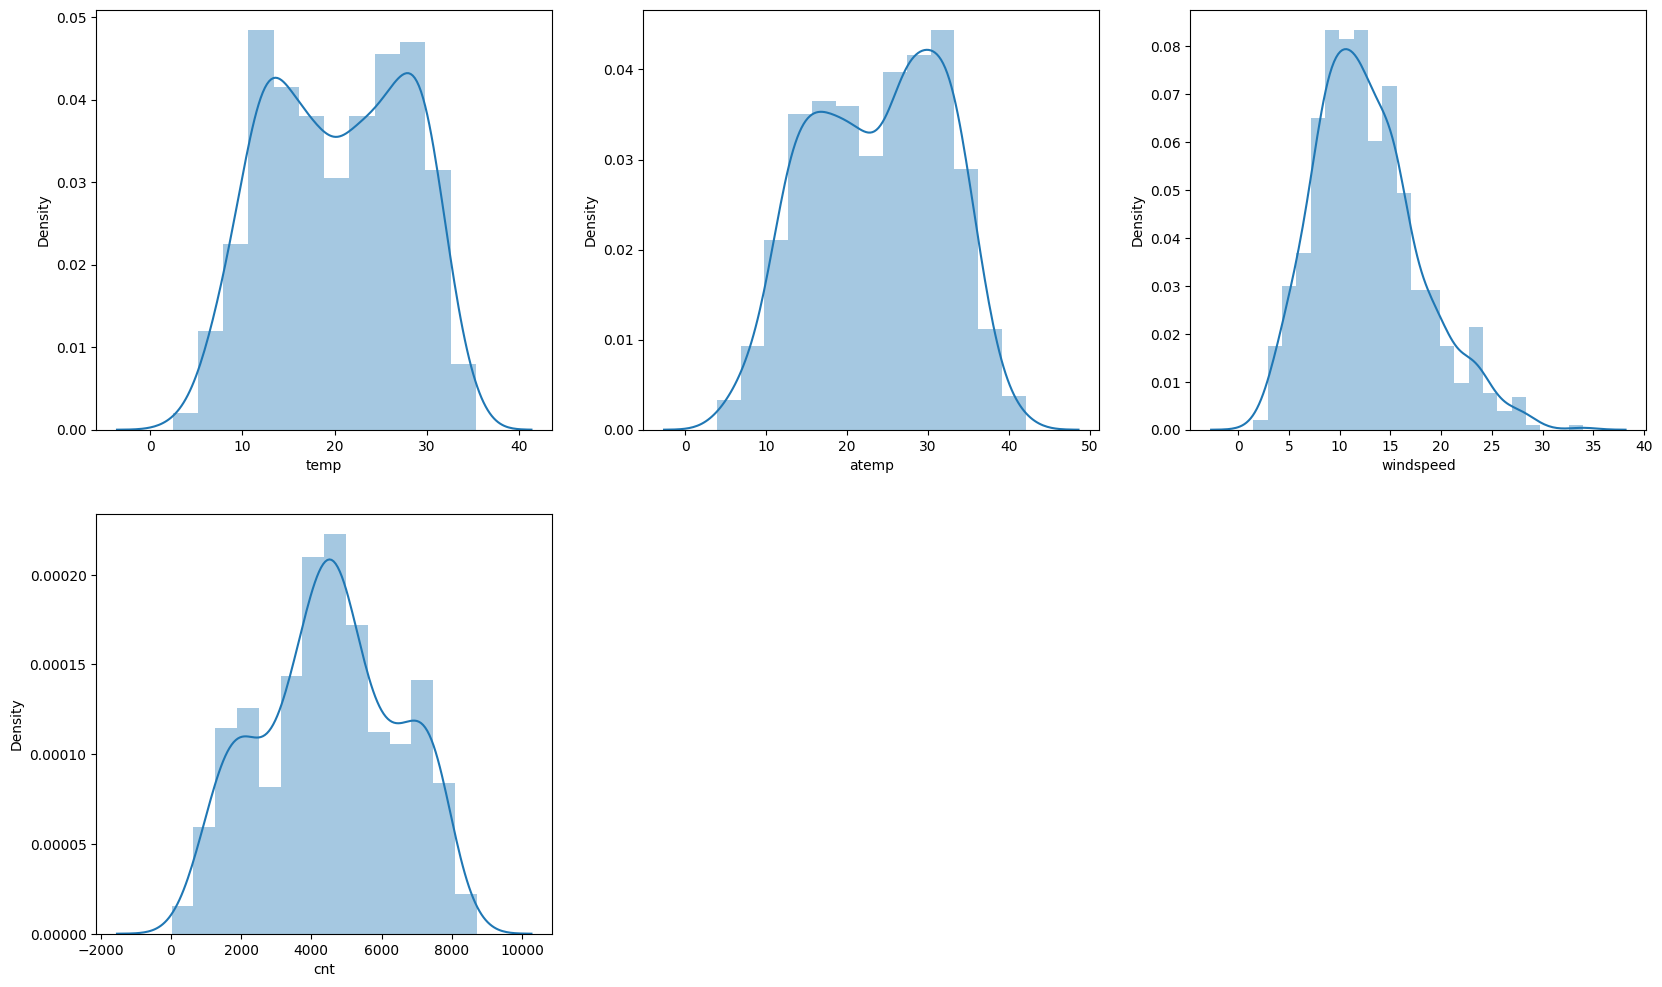

In [3202]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(data['temp'], kde=True)
plt.subplot(2,3,2)
sns.distplot(data['atemp'], kde=True)
plt.subplot(2,3,3)
sns.distplot(data['windspeed'], kde=True)
plt.subplot(2,3,4)
sns.distplot(data['cnt'], kde=True)
plt.show()

### The data is almost a normal distribution for the above continous variables which benefits the reliability, interpretability, and predictive performance of the model

### We will get a data visualization of categorical variables also

In [3203]:
# Find categorical columns
categorical = list(set(data.columns) - set(data.select_dtypes(include=['int64', 'float64', 'datetime']).columns))

In [3204]:
categorical

['workingday', 'holiday', 'mnth', 'weathersit', 'season', 'weekday', 'yr']

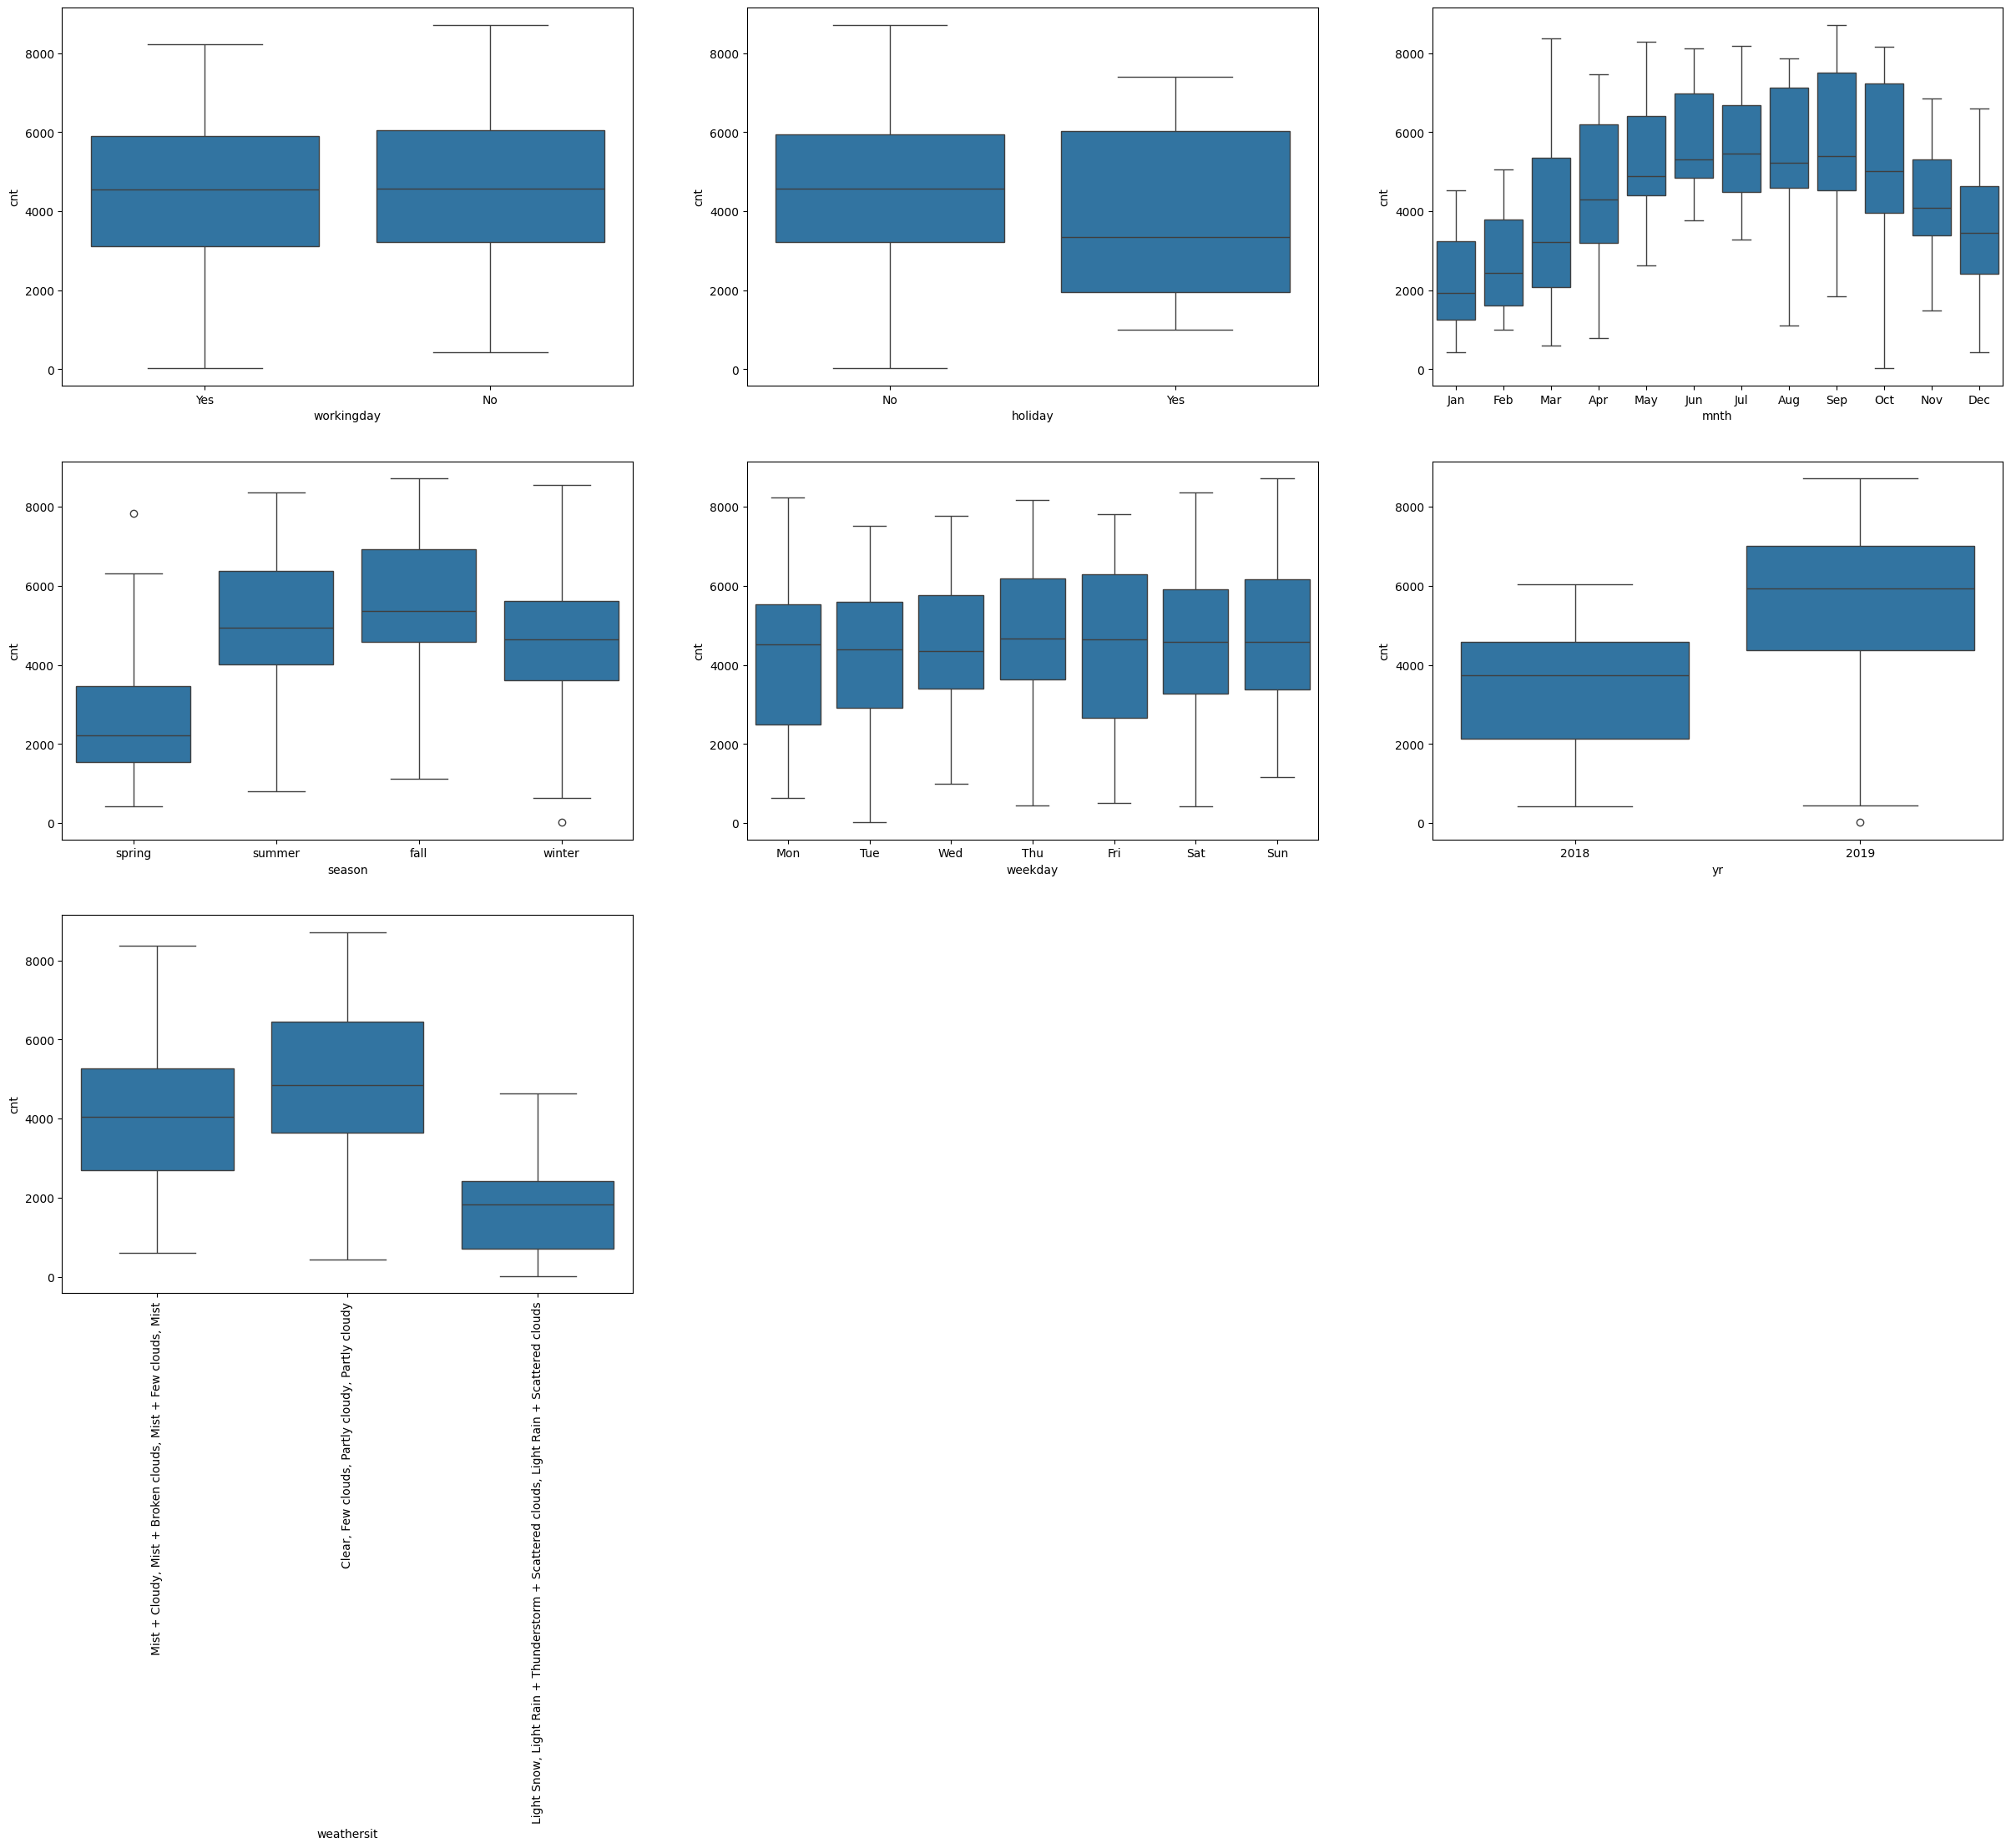

In [3205]:
plt.figure(figsize=(30, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.xticks(rotation=90)
plt.show()

## The observations are
1. Working day has almost equal impact on the count
2. Holidays have more impact on the count. The interquartile range is more on Holidays which indicate more users use on holidays.
3. For month wise, It gradually increases and during Apr-Oct the usage is high and then it decreases. It seems obvious that during winter the usage/count reduces
4. Summer and Fall have more usage comapred to winter and spring. Spring also has an outlier.
5. The weekday distribution is almost same with Fridays having a more interquartile range.
6. Average count is more in 2019 compared to 2018. It gives a slight hint of a yearly increase in usage.
7. When the weather situation is clear without clouds or few clouds people uses bike more. When there is snow the usage/count is low.


### As every season have all weather conditions lets plot season with hue as wethersit 

In [3206]:
data['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

### All four seasons have almost equal number of days

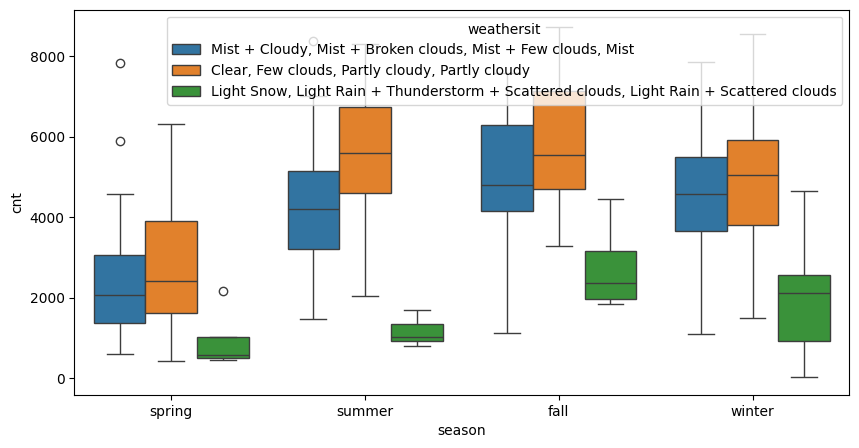

In [3207]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = data)
plt.show()

- As expected Winter has more snow, light rain due to which count is low
- Summer and Fall have more clear days, so count is high.

# We will make a pairplot for the numerical variables

In [3208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

### We have few int values which can be converted to float just to separate them from categorical variables (Not mandatory)

In [3209]:
data[['casual', 'registered', 'cnt']] = data[['casual', 'registered', 'cnt']].astype('float')

In [3210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    float64       
 14  registered  730 non-null    float64       
 15  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), floa

### Find numerical variables to create pairplot

In [3211]:
# We can do like below but it will include the instant column also which we need to remove after that
#numerical = list(set(data.select_dtypes(include=['float64', 'int64']).columns))
numerical = list(set(data.select_dtypes(include=['float64']).columns))
numerical

['cnt', 'registered', 'casual', 'hum', 'windspeed', 'temp', 'atemp']

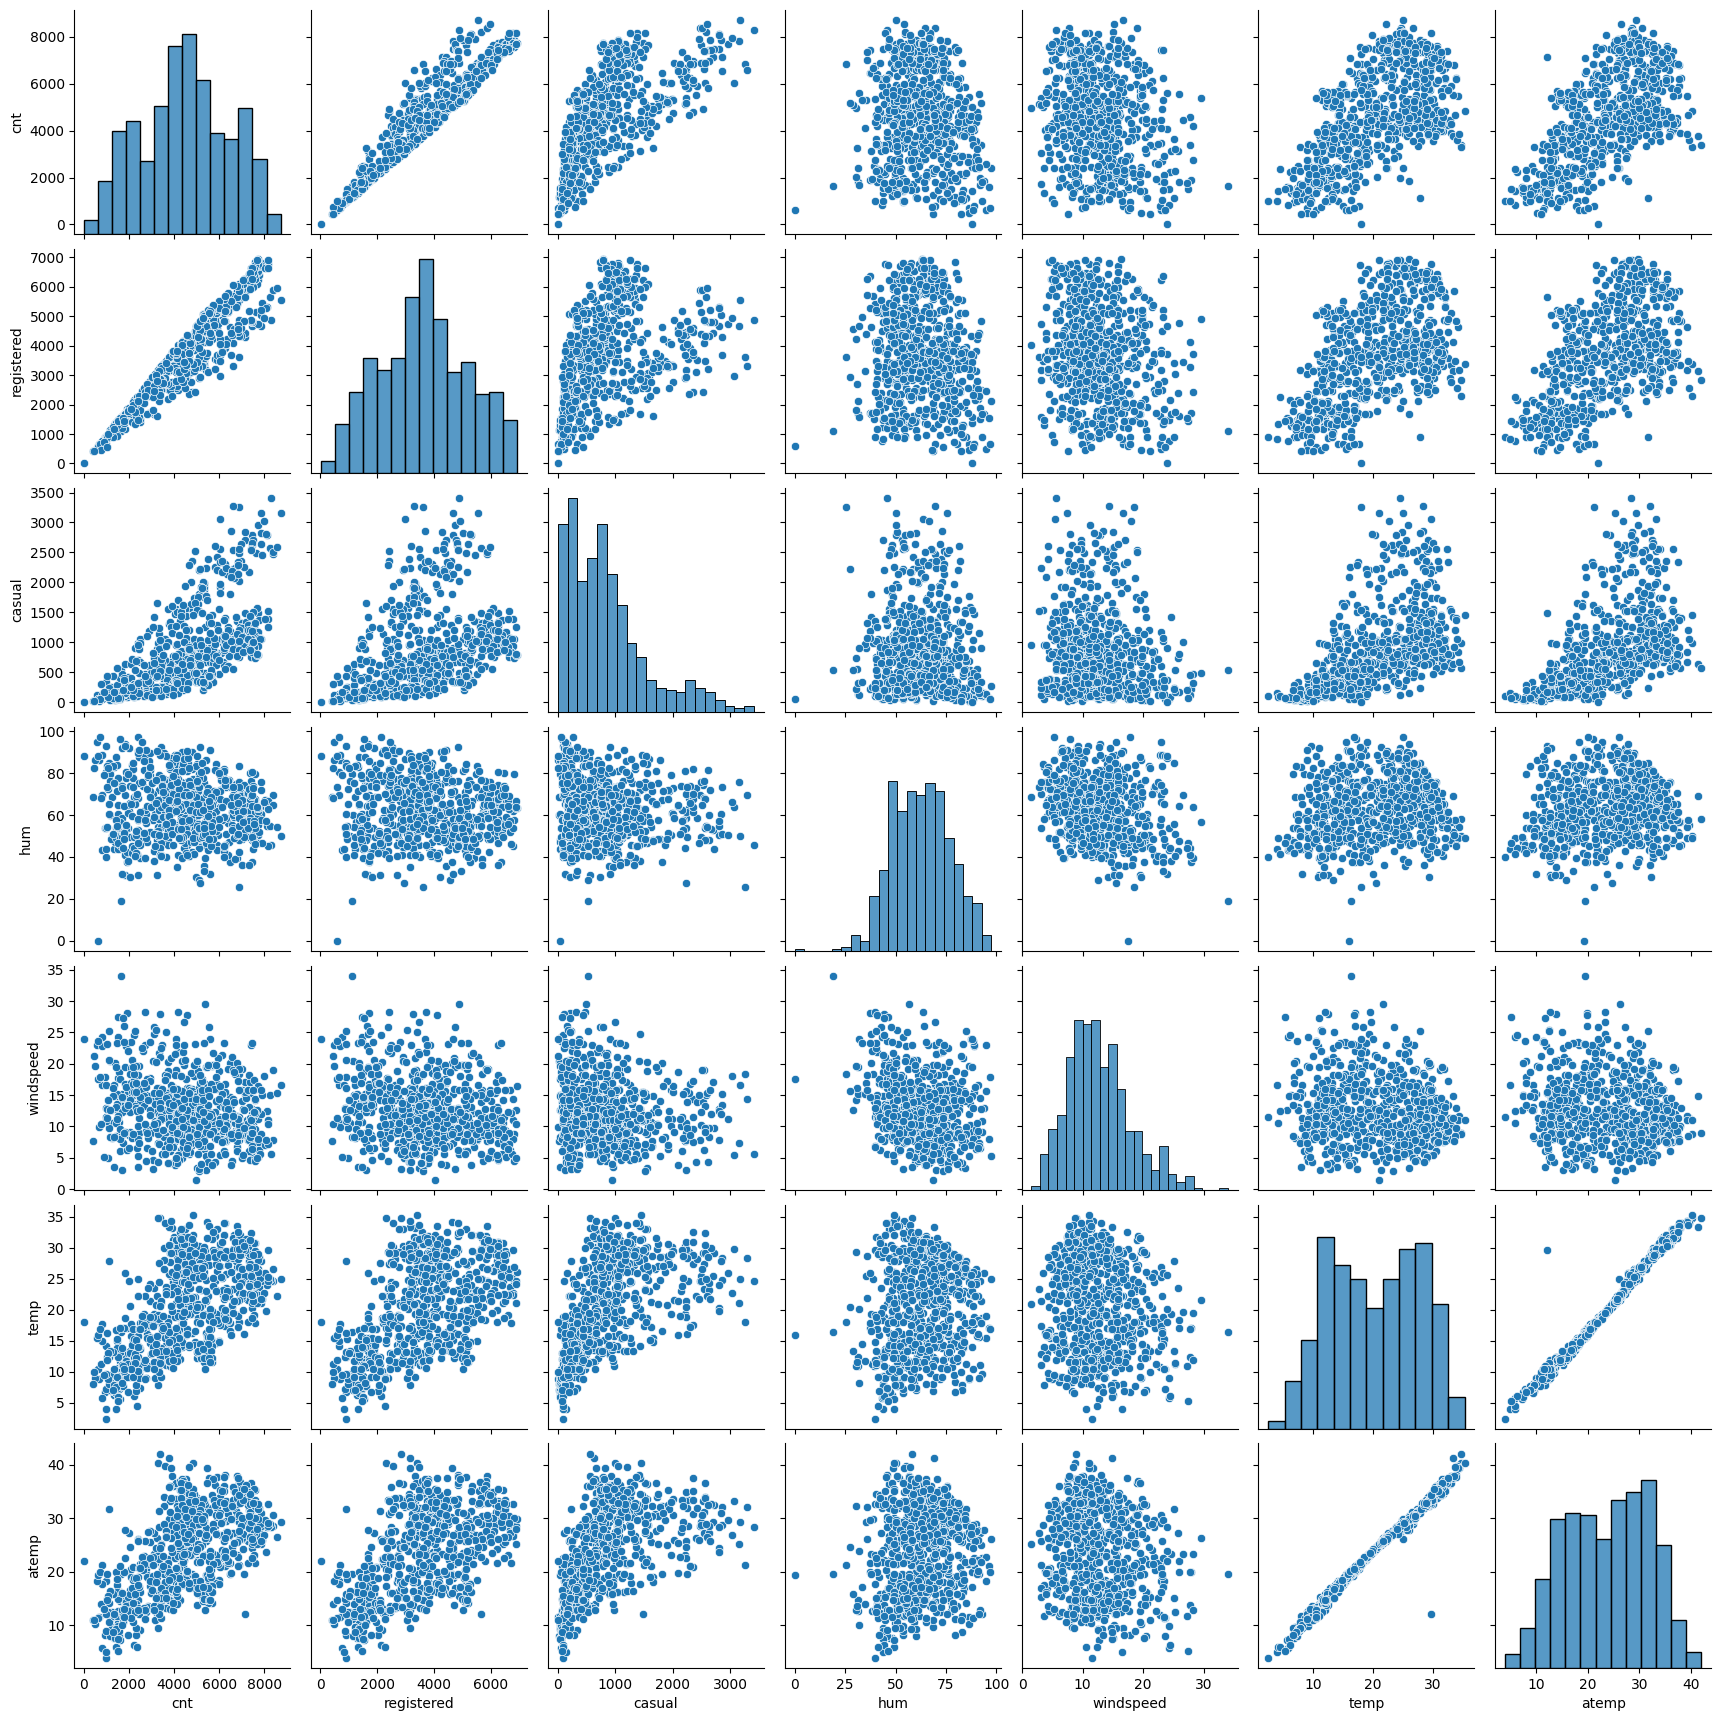

In [3212]:
sns.pairplot(data[numerical])
plt.show()

- We can see temp and atemp has a positive correlation.
- Registered and cnt has a positive correlation.
- cnt and casual has a positive correlation.
- temp and cnt has a positive correlation.

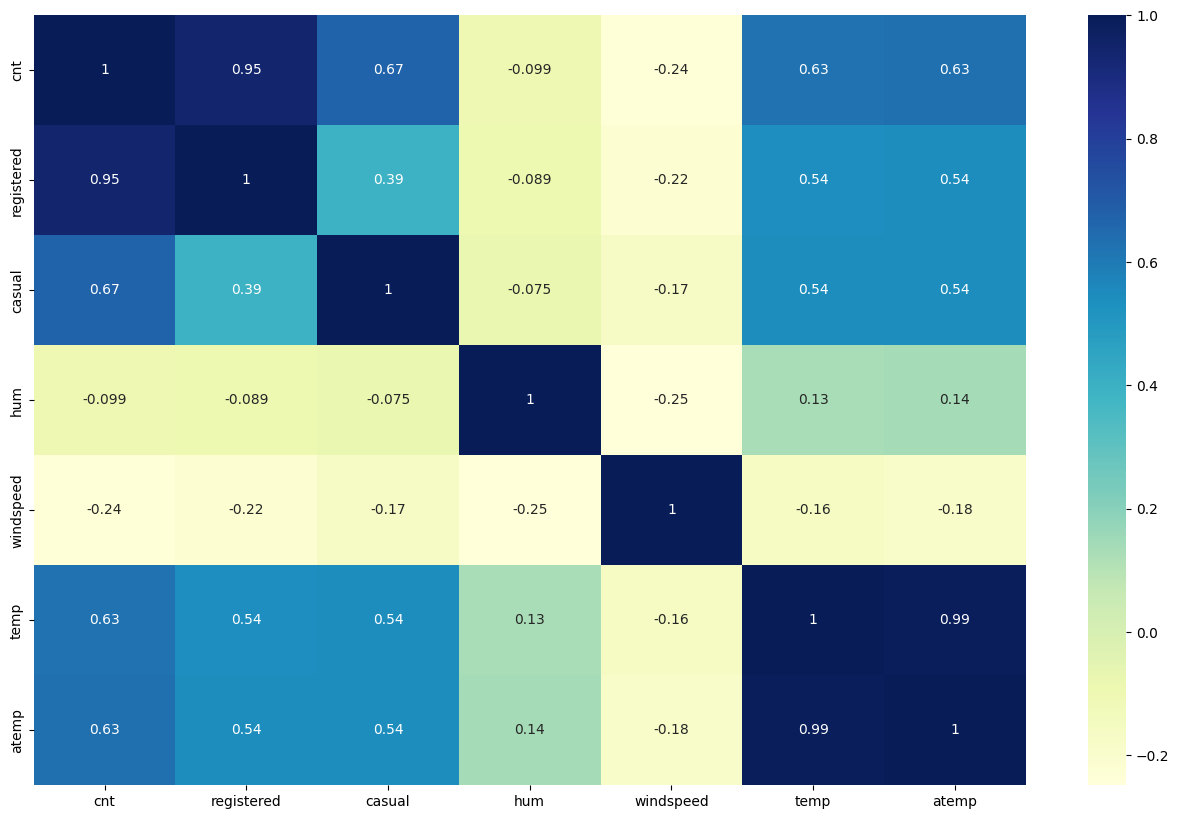

In [3213]:
plt.figure(figsize = (16, 10))
sns.heatmap(data[numerical].corr(), annot = True, cmap="YlGnBu")
plt.show()

### As observerd above, there is multicollinearity between independent variables
- temp and atemp has 0.99
- registered and temp has 0.54
- casual and temp has 0.54

### There is correlation between dependent and independent variables
- Registered and cnt has 0.95
- temp and cnt has 0.6

# Preparation of Data

### We need to prepare data to build models. The categorical variables should be converted to dummy variables
#### We will use drop_first=True to drop the first column as we require n-1 columns for a column with n types of values

In [3214]:
categorical_dummies = pd.get_dummies(data[categorical], drop_first = True, dtype=int)
categorical_dummies

workingday_Yes  holiday_Yes  mnth_Aug  mnth_Dec  mnth_Feb  mnth_Jan  \
0                 1            0         0         0         0         1   
1                 1            0         0         0         0         1   
2                 1            0         0         0         0         1   
3                 1            0         0         0         0         1   
4                 1            0         0         0         0         1   
..              ...          ...       ...       ...       ...       ...   
725               1            0         0         1         0         0   
726               0            0         0         1         0         0   
727               0            0         0         1         0         0   
728               1            0         0         1         0         0   
729               1            0         0         1         0         0   

     mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  ...  season_spring  \
0           0         0         0         0  ...              1   
1           0         0         0         0  ...              1   
2           0         0         0         0  ...              1   
3           0         0         0         0  ...              1   
4           0         0         0         0  ...              1   
..        ...       ...       ...       ...  ...            ...   
725         0         0         0         0  ...              1   
726         0         0         0         0  ...              1   
727         0         0         0         0  ...              1   
728         0         0         0         0  ...              1   
729         0         0         0         0  ...              1   

     season_summer  season_winter  weekday_Mon  weekday_Sat  weekday_Sun  \
0                0              0            1            0            0   
1                0              0            0            0            0   
2                0              0            0            0            0   
3                0              0            0            0            0   
4                0              0            0            0            0   
..             ...            ...          ...          ...          ...   
725              0              0            0            0            0   
726              0              0            0            1            0   
727              0              0            0            0            1   
728              0              0            1            0            0   
729              0              0            0            0            0   

     weekday_Thu  weekday_Tue  weekday_Wed  yr_2019  
0              0            0            0        0  
1              0            1            0        0  
2              0            0            1        0  
3              1            0            0        0  
4              0            0            0        0  
..           ...          ...          ...      ...  
725            0            0            0        1  
726            0            0            0        1  
727            0            0            0        1  
728            0            0            0        1  
729            0            1            0        1  

[730 rows x 25 columns]

In [3215]:
categorical_dummies.columns

Index(['workingday_Yes', 'holiday_Yes', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'season_spring', 'season_summer', 'season_winter', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'yr_2019'],
      dtype='object')

### Concatenate the dummies to original dataset

In [3216]:
data = pd.concat([data, categorical_dummies], axis = 1)

In [3217]:
data.head()

instant     dteday  season    yr mnth holiday weekday workingday  \
0        1 2018-01-01  spring  2018  Jan      No     Mon        Yes   
1        2 2018-01-02  spring  2018  Jan      No     Tue        Yes   
2        3 2018-01-03  spring  2018  Jan      No     Wed        Yes   
3        4 2018-01-04  spring  2018  Jan      No     Thu        Yes   
4        5 2018-01-05  spring  2018  Jan      No     Fri        Yes   

                                          weathersit       temp  ...  \
0  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  14.110847  ...   
1  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  14.902598  ...   
2    Clear, Few clouds, Partly cloudy, Partly cloudy   8.050924  ...   
3    Clear, Few clouds, Partly cloudy, Partly cloudy   8.200000  ...   
4    Clear, Few clouds, Partly cloudy, Partly cloudy   9.305237  ...   

   season_spring  season_summer  season_winter  weekday_Mon  weekday_Sat  \
0              1              0              0            1            0   
1              1              0              0            0            0   
2              1              0              0            0            0   
3              1              0              0            0            0   
4              1              0              0            0            0   

   weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  yr_2019  
0            0            0            0            0        0  
1            0            0            1            0        0  
2            0            0            0            1        0  
3            0            1            0            0        0  
4            0            0            0            0        0  

[5 rows x 41 columns]

### Drop categorical variable columns from original dataset

In [3218]:
data.drop(categorical, axis = 1, inplace = True)

In [3219]:
data.head()

instant     dteday       temp     atemp      hum  windspeed  casual  \
0        1 2018-01-01  14.110847  18.18125  80.5833  10.749882   331.0   
1        2 2018-01-02  14.902598  17.68695  69.6087  16.652113   131.0   
2        3 2018-01-03   8.050924   9.47025  43.7273  16.636703   120.0   
3        4 2018-01-04   8.200000  10.60610  59.0435  10.739832   108.0   
4        5 2018-01-05   9.305237  11.46350  43.6957  12.522300    82.0   

   registered     cnt  workingday_Yes  ...  season_spring  season_summer  \
0       654.0   985.0               1  ...              1              0   
1       670.0   801.0               1  ...              1              0   
2      1229.0  1349.0               1  ...              1              0   
3      1454.0  1562.0               1  ...              1              0   
4      1518.0  1600.0               1  ...              1              0   

   season_winter  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
0              0            1            0            0            0   
1              0            0            0            0            0   
2              0            0            0            0            0   
3              0            0            0            0            1   
4              0            0            0            0            0   

   weekday_Tue  weekday_Wed  yr_2019  
0            0            0        0  
1            1            0        0  
2            0            1        0  
3            0            0        0  
4            0            0        0  

[5 rows x 34 columns]

### We can drop the instant and dteday column as they don't help in any analysis

In [3220]:
data.drop(['instant', 'dteday'], axis=1, inplace=True)
data.head()

temp     atemp      hum  windspeed  casual  registered     cnt  \
0  14.110847  18.18125  80.5833  10.749882   331.0       654.0   985.0   
1  14.902598  17.68695  69.6087  16.652113   131.0       670.0   801.0   
2   8.050924   9.47025  43.7273  16.636703   120.0      1229.0  1349.0   
3   8.200000  10.60610  59.0435  10.739832   108.0      1454.0  1562.0   
4   9.305237  11.46350  43.6957  12.522300    82.0      1518.0  1600.0   

   workingday_Yes  holiday_Yes  mnth_Aug  ...  season_spring  season_summer  \
0               1            0         0  ...              1              0   
1               1            0         0  ...              1              0   
2               1            0         0  ...              1              0   
3               1            0         0  ...              1              0   
4               1            0         0  ...              1              0   

   season_winter  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
0              0            1            0            0            0   
1              0            0            0            0            0   
2              0            0            0            0            0   
3              0            0            0            0            1   
4              0            0            0            0            0   

   weekday_Tue  weekday_Wed  yr_2019  
0            0            0        0  
1            1            0        0  
2            0            1        0  
3            0            0        0  
4            0            0        0  

[5 rows x 32 columns]

### We can drop casual and registered as cnt is the sum of both and our dependent variable is cnt

In [3221]:
data.drop(['casual', 'registered'], axis=1, inplace=True)
data.head()

temp     atemp      hum  windspeed     cnt  workingday_Yes  \
0  14.110847  18.18125  80.5833  10.749882   985.0               1   
1  14.902598  17.68695  69.6087  16.652113   801.0               1   
2   8.050924   9.47025  43.7273  16.636703  1349.0               1   
3   8.200000  10.60610  59.0435  10.739832  1562.0               1   
4   9.305237  11.46350  43.6957  12.522300  1600.0               1   

   holiday_Yes  mnth_Aug  mnth_Dec  mnth_Feb  ...  season_spring  \
0            0         0         0         0  ...              1   
1            0         0         0         0  ...              1   
2            0         0         0         0  ...              1   
3            0         0         0         0  ...              1   
4            0         0         0         0  ...              1   

   season_summer  season_winter  weekday_Mon  weekday_Sat  weekday_Sun  \
0              0              0            1            0            0   
1              0              0            0            0            0   
2              0              0            0            0            0   
3              0              0            0            0            0   
4              0              0            0            0            0   

   weekday_Thu  weekday_Tue  weekday_Wed  yr_2019  
0            0            0            0        0  
1            0            1            0        0  
2            0            0            1        0  
3            1            0            0        0  
4            0            0            0        0  

[5 rows x 30 columns]

### temp and atemp has a correlation of 0.99. Due to the high value we can drop it which is better for the model as it reduces multicollinearity

In [3222]:
data.drop(['atemp'], axis=1, inplace=True)
data.head()

temp      hum  windspeed     cnt  workingday_Yes  holiday_Yes  \
0  14.110847  80.5833  10.749882   985.0               1            0   
1  14.902598  69.6087  16.652113   801.0               1            0   
2   8.050924  43.7273  16.636703  1349.0               1            0   
3   8.200000  59.0435  10.739832  1562.0               1            0   
4   9.305237  43.6957  12.522300  1600.0               1            0   

   mnth_Aug  mnth_Dec  mnth_Feb  mnth_Jan  ...  season_spring  season_summer  \
0         0         0         0         1  ...              1              0   
1         0         0         0         1  ...              1              0   
2         0         0         0         1  ...              1              0   
3         0         0         0         1  ...              1              0   
4         0         0         0         1  ...              1              0   

   season_winter  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
0              0            1            0            0            0   
1              0            0            0            0            0   
2              0            0            0            0            0   
3              0            0            0            0            1   
4              0            0            0            0            0   

   weekday_Tue  weekday_Wed  yr_2019  
0            0            0        0  
1            1            0        0  
2            0            1        0  
3            0            0        0  
4            0            0        0  

[5 rows x 29 columns]

# We can create train and test data

In [3223]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

## Now, we have split the data into train and test set. The next step is to scale the data
It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients obtained by fitting the regression model might be very large or very small when compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:
1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [3224]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

### We need to find the numerical values for scaling. We don't need to scale dummy variables as it is already between 0 and 1

In [3225]:
train_numerical = list(set(data.select_dtypes(include=['float64']).columns))
train_numerical

['temp', 'hum', 'windspeed', 'cnt']

In [3226]:
df_train[train_numerical] = scaler.fit_transform(df_train[train_numerical])
df_train.head()

temp       hum  windspeed       cnt  workingday_Yes  holiday_Yes  \
653  0.509887  0.575354   0.300794  0.864243               1            0   
576  0.815169  0.725633   0.264686  0.827658               1            0   
426  0.442393  0.640189   0.255342  0.465255               0            0   
728  0.245101  0.498067   0.663106  0.204096               1            0   
482  0.395666  0.504508   0.188475  0.482973               0            0   

     mnth_Aug  mnth_Dec  mnth_Feb  mnth_Jan  ...  season_spring  \
653         0         0         0         0  ...              0   
576         0         0         0         0  ...              0   
426         0         0         0         0  ...              1   
728         0         1         0         0  ...              1   
482         0         0         0         0  ...              0   

     season_summer  season_winter  weekday_Mon  weekday_Sat  weekday_Sun  \
653              0              1            0            0            0   
576              0              0            0            0            0   
426              0              0            0            0            1   
728              0              0            1            0            0   
482              1              0            0            0            1   

     weekday_Thu  weekday_Tue  weekday_Wed  yr_2019  
653            0            0            1        1  
576            0            0            1        1  
426            0            0            0        1  
728            0            0            0        1  
482            0            0            0        1  

[5 rows x 29 columns]

In [3227]:
df_train.describe()

temp         hum   windspeed         cnt  workingday_Yes  \
count  510.000000  510.000000  510.000000  510.000000      510.000000   
mean     0.537262    0.650369    0.320768    0.513620        0.711765   
std      0.225844    0.145882    0.169797    0.224593        0.453386   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.339853    0.538643    0.199179    0.356420        0.000000   
50%      0.540519    0.653714    0.296763    0.518638        1.000000   
75%      0.735215    0.754830    0.414447    0.684710        1.000000   
max      1.000000    1.000000    1.000000    1.000000        1.000000   

       holiday_Yes    mnth_Aug    mnth_Dec    mnth_Feb    mnth_Jan  ...  \
count   510.000000  510.000000  510.000000  510.000000  510.000000  ...   
mean      0.025490    0.096078    0.084314    0.066667    0.088235  ...   
std       0.157763    0.294988    0.278131    0.249689    0.283915  ...   
min       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
50%       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
75%       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
max       1.000000    1.000000    1.000000    1.000000    1.000000  ...   

       season_spring  season_summer  season_winter  weekday_Mon  weekday_Sat  \
count     510.000000     510.000000      510.00000   510.000000   510.000000   
mean        0.243137       0.245098        0.24902     0.154902     0.129412   
std         0.429398       0.430568        0.43287     0.362166     0.335985   
min         0.000000       0.000000        0.00000     0.000000     0.000000   
25%         0.000000       0.000000        0.00000     0.000000     0.000000   
50%         0.000000       0.000000        0.00000     0.000000     0.000000   
75%         0.000000       0.000000        0.00000     0.000000     0.000000   
max         1.000000       1.000000        1.00000     1.000000     1.000000   

       weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed     yr_2019  
count   510.000000   510.000000   510.000000   510.000000  510.000000  
mean      0.137255     0.143137     0.152941     0.135294    0.507843  
std       0.344454     0.350557     0.360284     0.342373    0.500429  
min       0.000000     0.000000     0.000000     0.000000    0.000000  
25%       0.000000     0.000000     0.000000     0.000000    0.000000  
50%       0.000000     0.000000     0.000000     0.000000    1.000000  
75%       0.000000     0.000000     0.000000     0.000000    1.000000  
max       1.000000     1.000000     1.000000     1.000000    1.000000  

[8 rows x 29 columns]

### The max value is 1 and min value is 0 after scaling for all columns

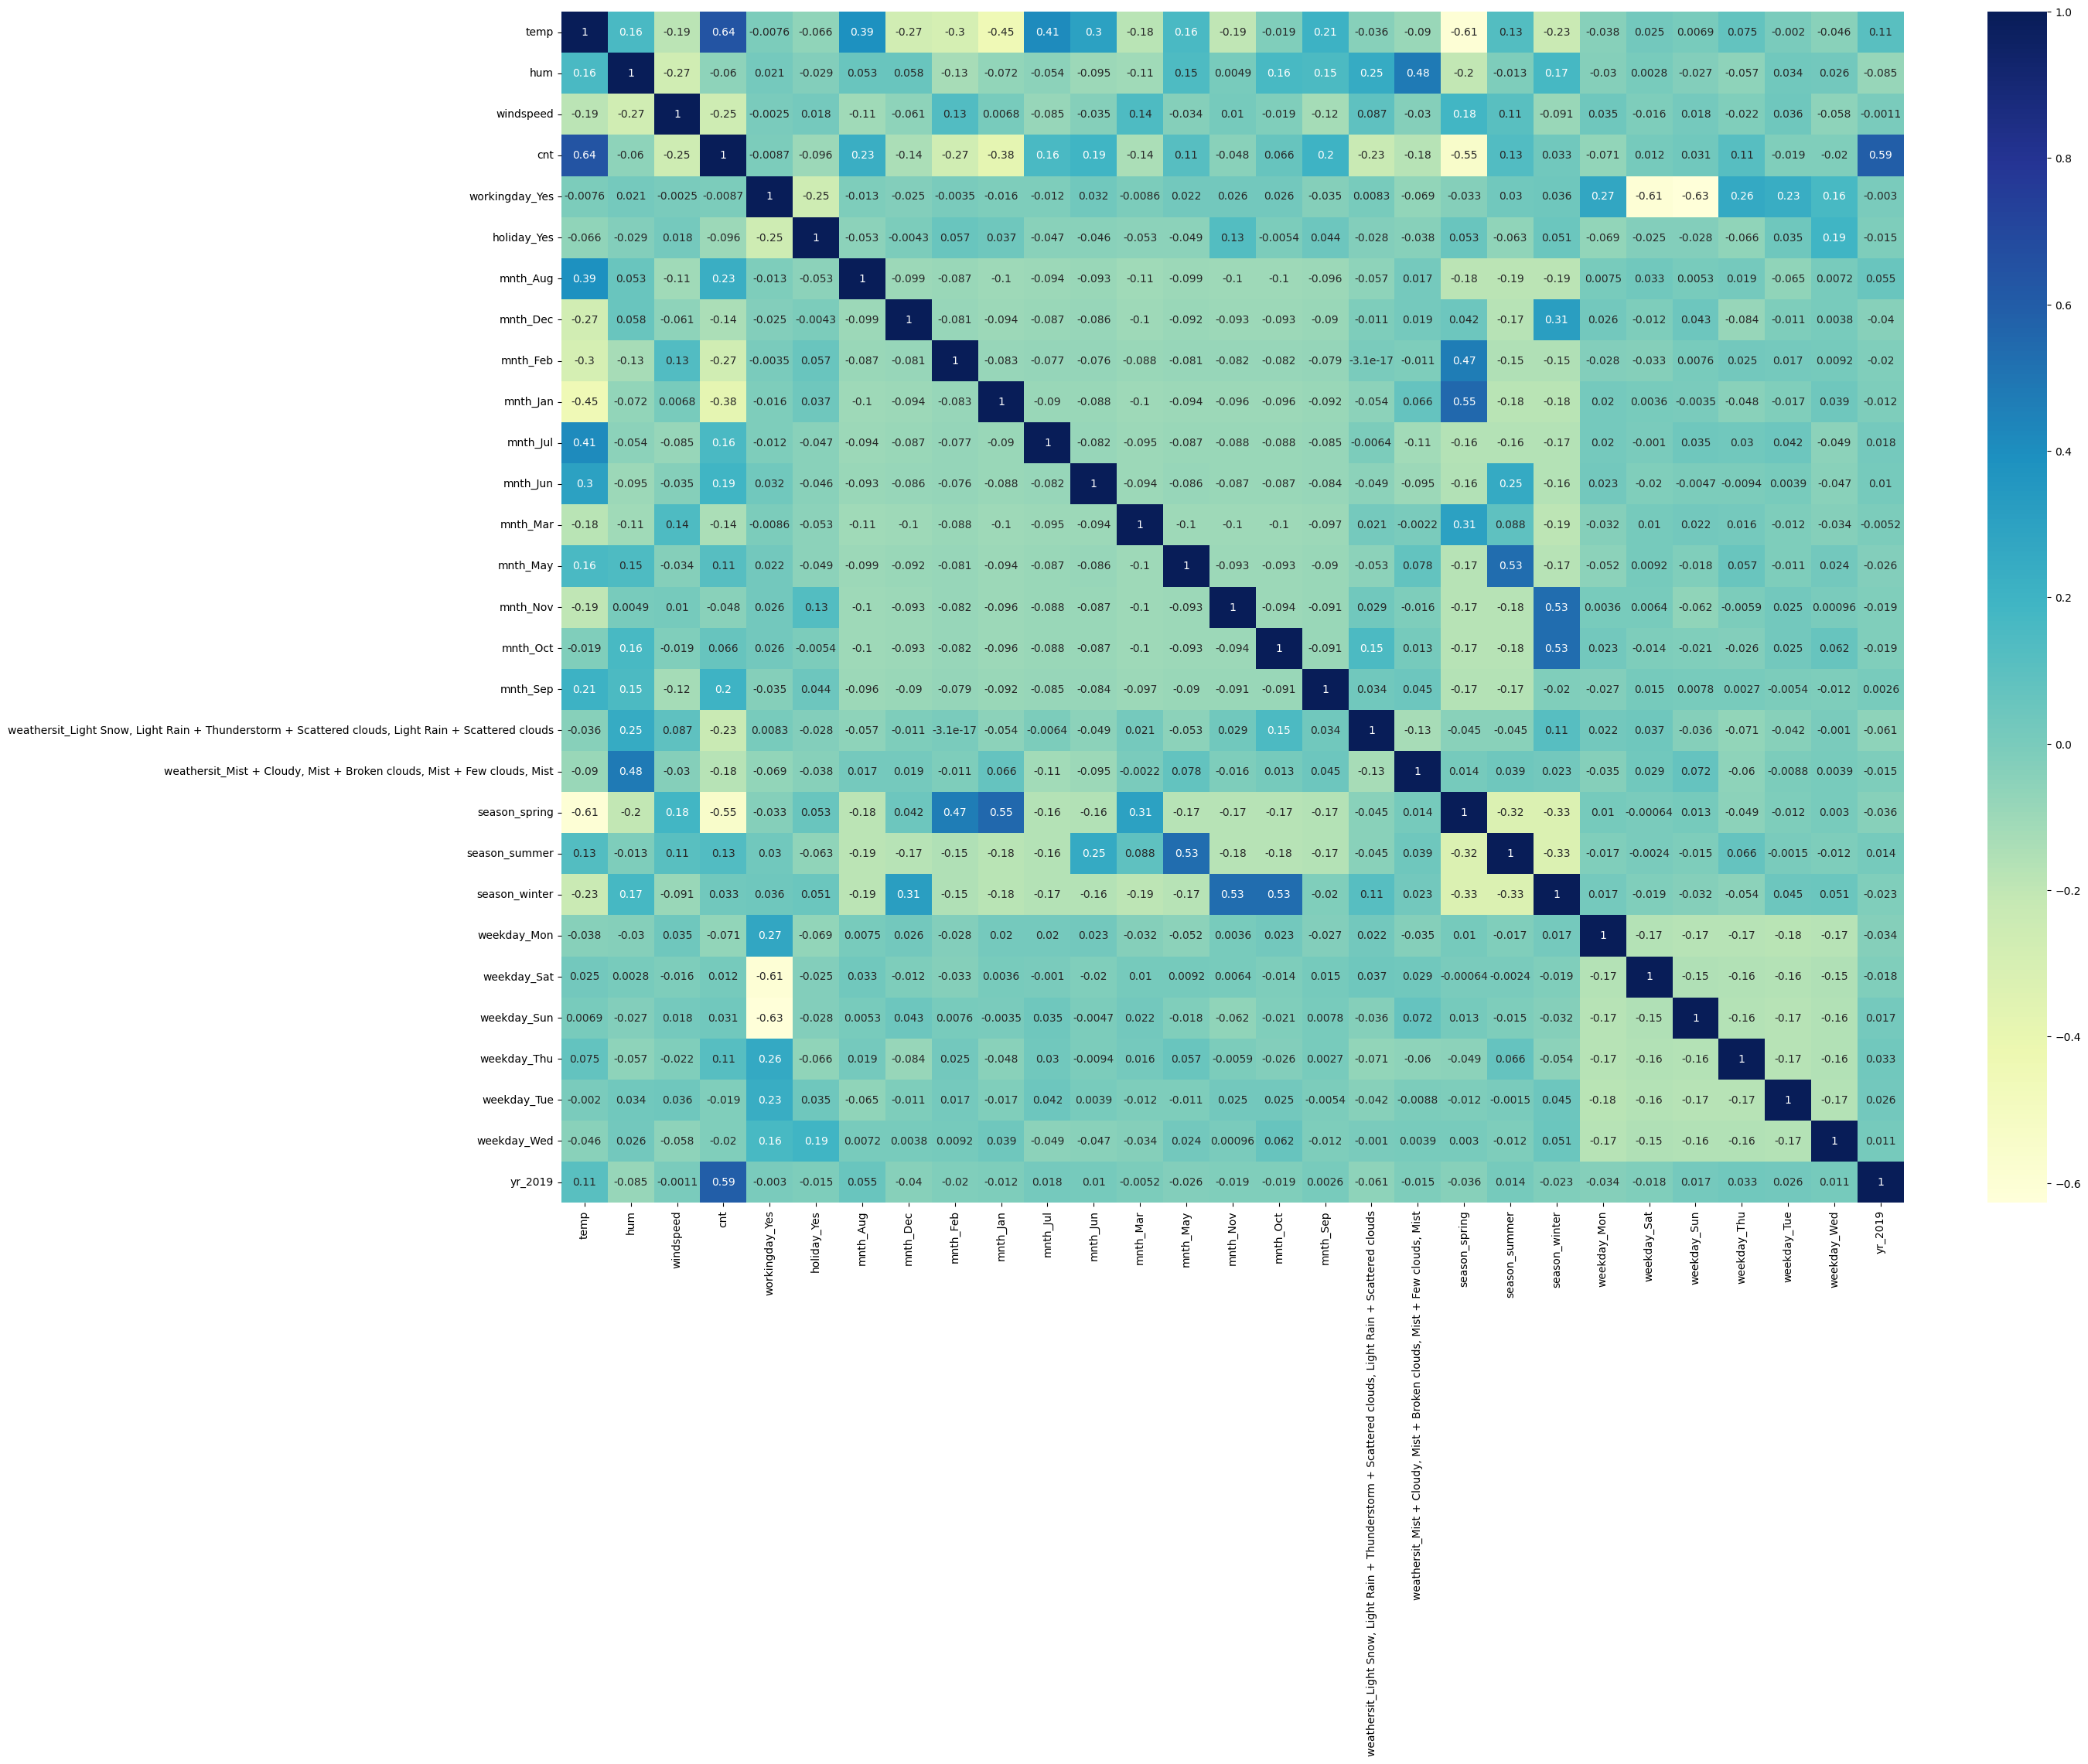

In [3228]:
# We will check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (28, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### As you have noticed temp has a high correlation with cnt
We will plot a scatter plot for the same

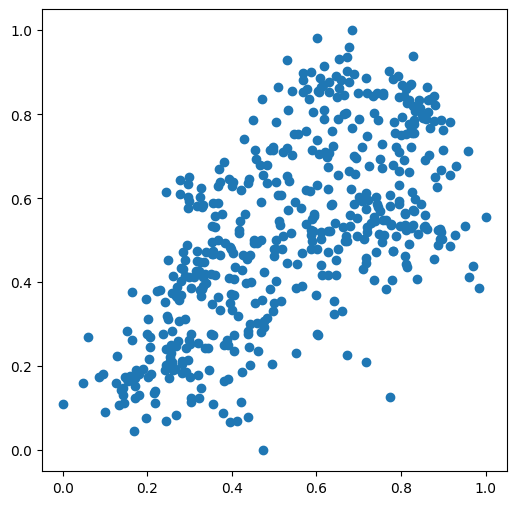

In [3229]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

We will pick temp as the first variable and will try to fit a regression line to that

## Dividing to X and Y sets for model building

In [3230]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building a linear model

Fit a regression line through the training data using `statsmodels`. In `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [3231]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [3232]:
lr.params

const    0.169798
temp     0.639952
dtype: float64

### We will visualize using a scatter plot

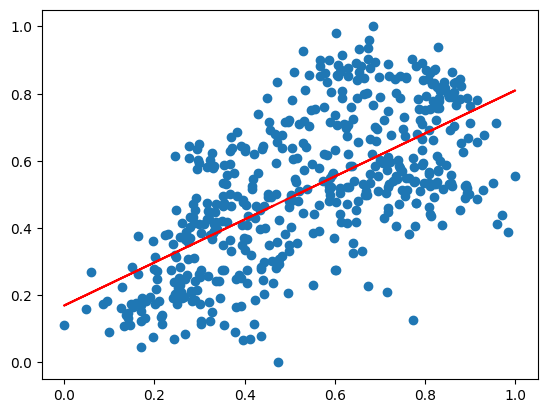

In [3233]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.1697 + 0.6399*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [3234]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           5.80e-61
Time:                        21:58:58   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

### The R-square is 0.414. We have so many variables to add to increase the value. Let us try that.

#### We will also check the correlation between independent variables before that

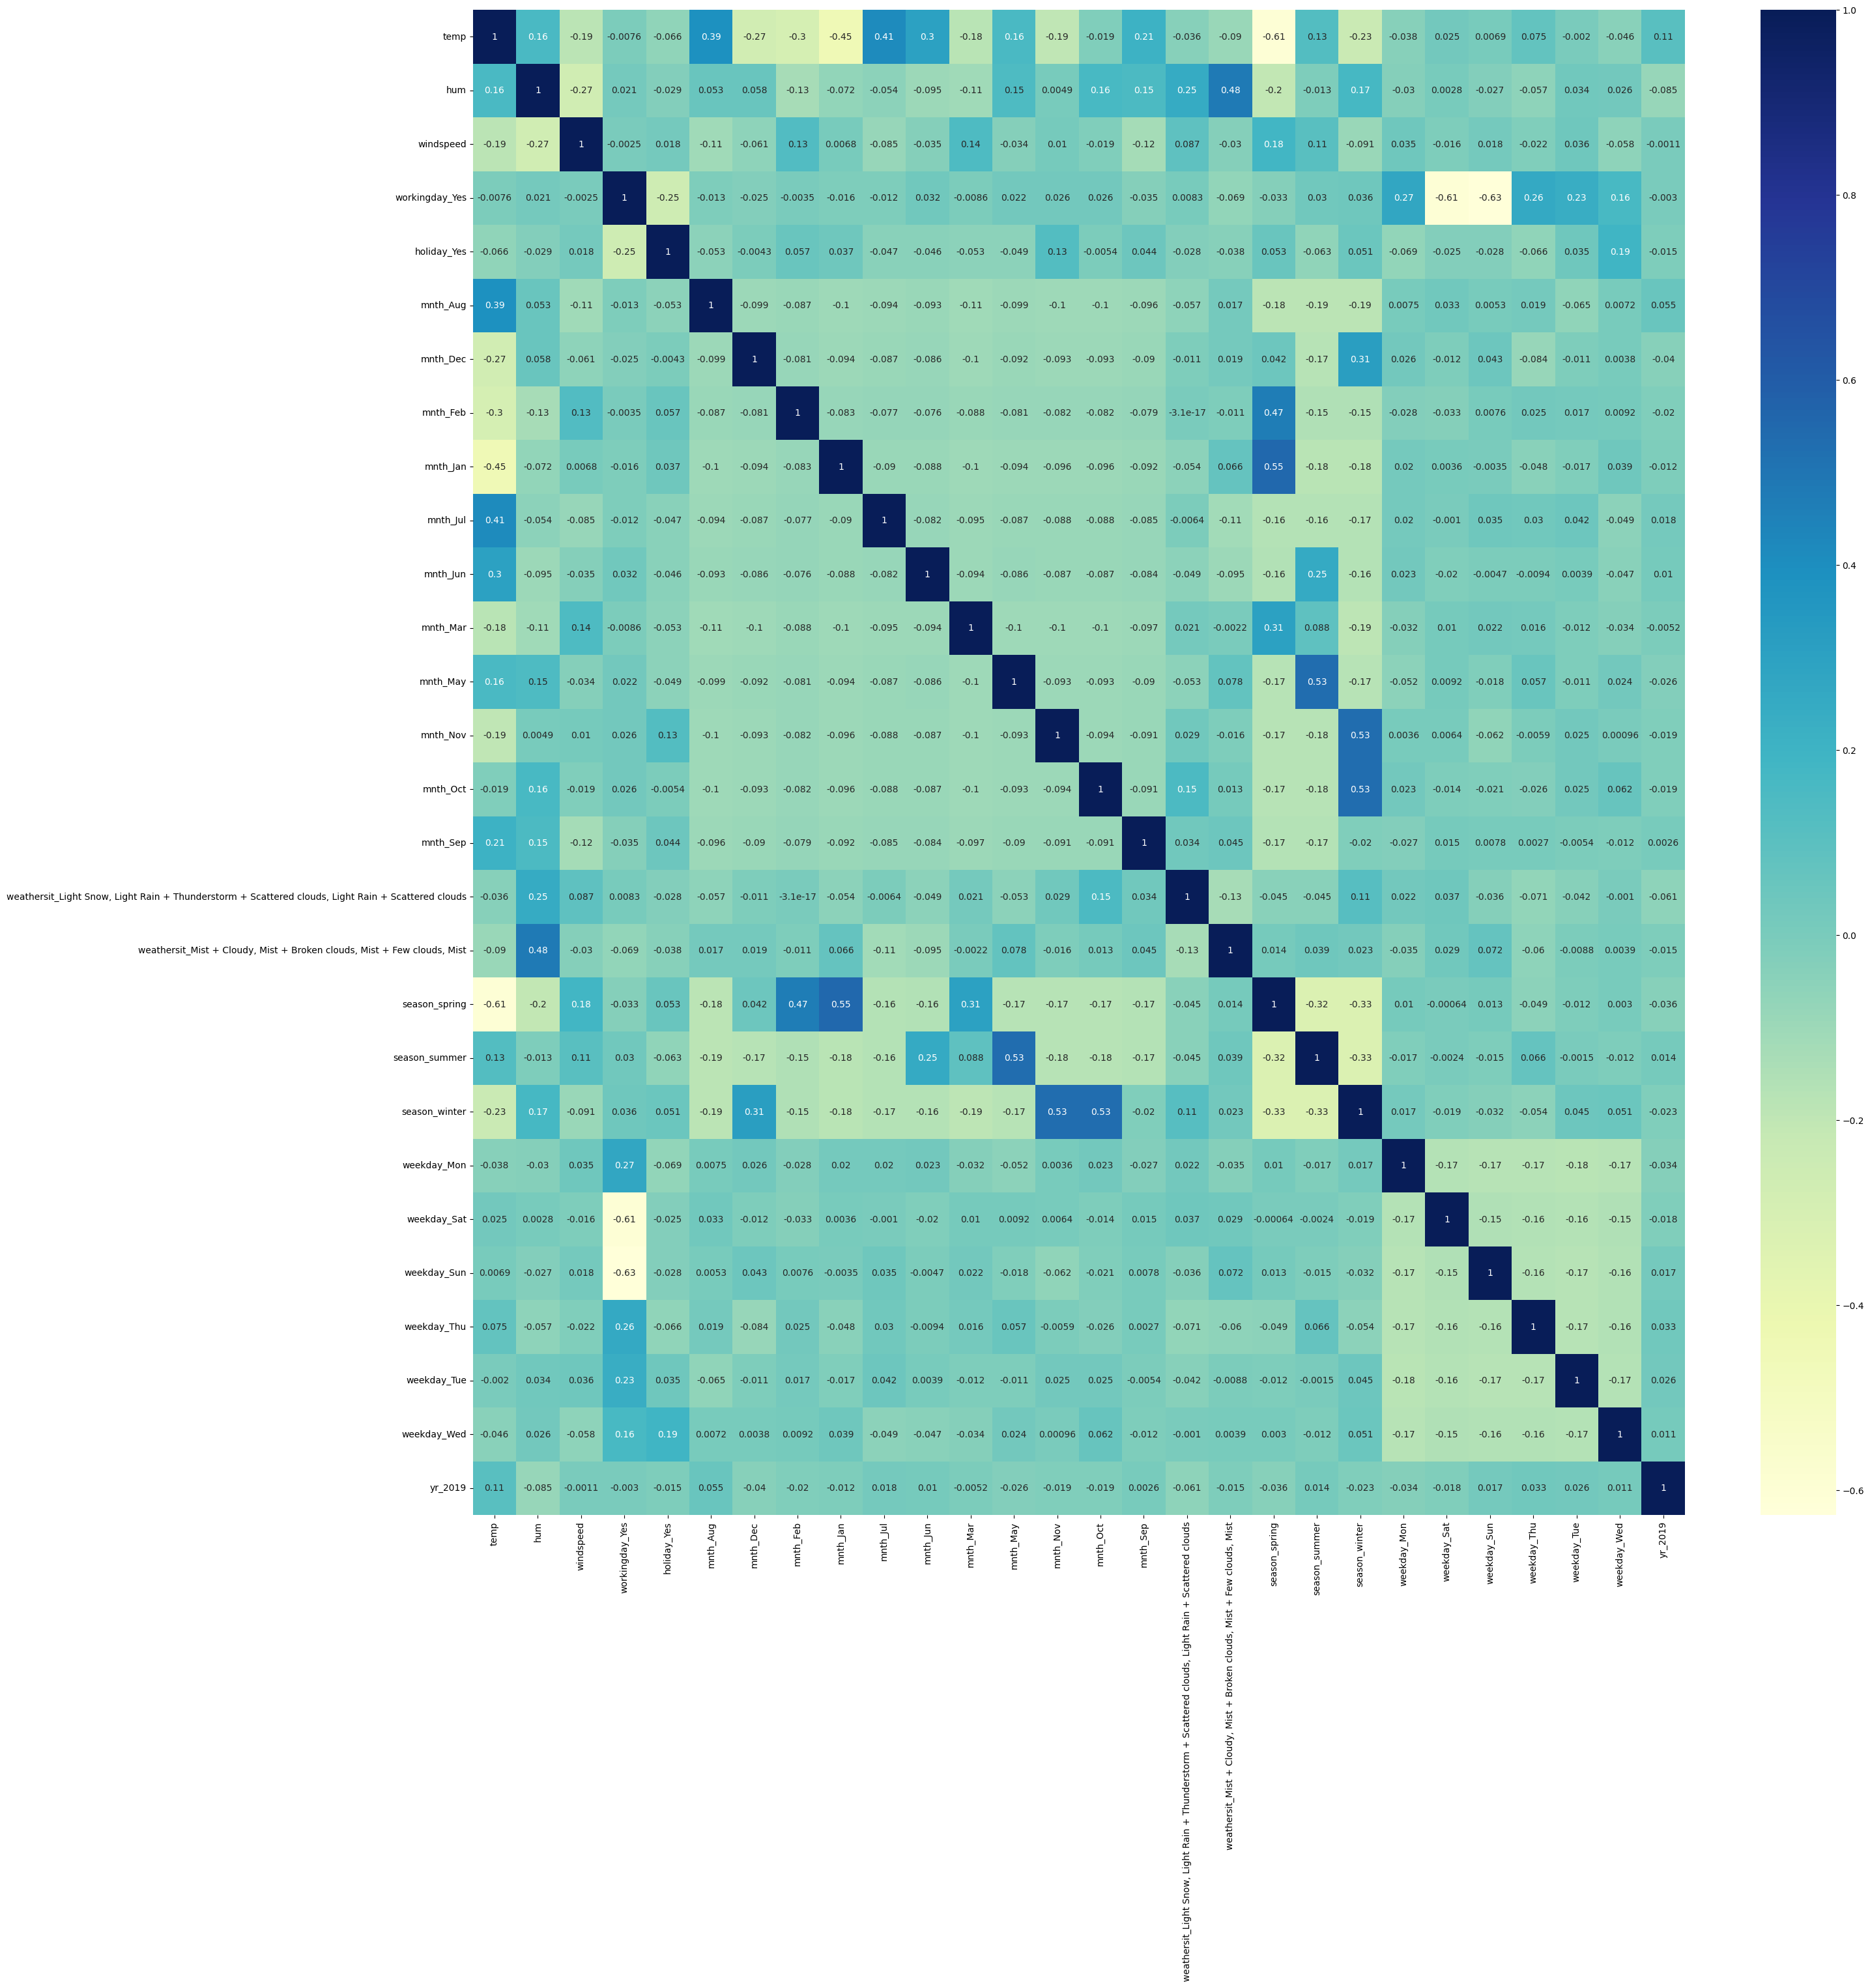

In [3235]:
plt.figure(figsize = (30, 30))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### There are indedpendent variables which are correlated to each other like
- temp vs month_jul
- hum vs weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- season_winter vs month_Nov
- season_winter vs month_oct
- season_spring vs month_Feb
- season_spring vs month_Jan
- weekday_Sat vs workingday_Yes (negative)
- weekday_Sun vs workingday_Yes (negative)

### We have multiple approaches to add predictor variables to our model
- Bottom-up approach (We start with one and add variables)
- Top-bottom approach (We start with all and remove irrelevant)
- Variable selection suing RFE

### We will use both top-bottom and RFE as there are a lot of variables. RFE is done second.

## Top bottom approach

In [3236]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [3237]:
lr_1.params

const                                                                                                 0.394543
temp                                                                                                  0.445458
hum                                                                                                  -0.157315
windspeed                                                                                            -0.183046
workingday_Yes                                                                                       -0.060524
holiday_Yes                                                                                          -0.135424
mnth_Aug                                                                                              0.021507
mnth_Dec                                                                                             -0.045669
mnth_Feb                                                                                             -0.037279
m

In [3238]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          4.33e-179
Time:                        21:59:00   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

## We can see when we use all the variables the R squared and Adj. R squared has increased from ~0.4 to ~0.8

### We will check the VIF and see which variables we can remove

In [3239]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                                      workingday_Yes  63.89
0                                                temp  43.99
1                                                 hum  41.17
18                                      season_spring  13.54
20                                      season_winter  12.51
23                                        weekday_Sun  12.35
22                                        weekday_Sat  11.83
19                                      season_summer   9.84
13                                           mnth_Nov   7.16
14                                           mnth_Oct   6.96
5                                            mnth_Aug   6.86
8                                            mnth_Jan   6.09
9                                            mnth_Jul   5.97
6                                            mnth_Dec   5.78
2                                           windspeed   5.59
15                                           mnth_Sep   5.06
7                                            mnth_Feb   4.50
11                                           mnth_Mar   3.72
10                                           mnth_Jun   3.04
4                                         holiday_Yes   2.82
17  weathersit_Mist + Cloudy, Mist + Broken clouds...   2.43
12                                           mnth_May   2.43
27                                            yr_2019   2.14
21                                        weekday_Mon   2.09
25                                        weekday_Tue   2.09
24                                        weekday_Thu   2.04
26                                        weekday_Wed   1.98
16  weathersit_Light Snow, Light Rain + Thundersto...   1.33

### Clearly we can see a lot of variables with VIF greater than 5. We will check the p value also to drop the highly correlated and insignificant variables 

    Name              P value  VIF
    mnth_Mar           0.980   3.72
    mnth_Jun           0.969   3.04
    mnth_Oct           0.873   6.96
    weekday_Thu        0.796   2.04
    mnth_Aug           0.527   6.86
    weekday_Sun        0.485   12.35


We will drop `mnth_Mar` as it has high P value and see how it changes after that.

In [3240]:
X = X_train.drop('mnth_Mar', axis=1)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          4.24e-180
Time:                        21:59:00   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

### Adjusted R square increased a little from 0.842 to 0.843. R square didn't change.

In [3241]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                                      workingday_Yes  57.64
0                                                temp  43.34
1                                                 hum  40.56
19                                      season_winter  11.96
17                                      season_spring  11.60
22                                        weekday_Sun  11.11
21                                        weekday_Sat  10.72
18                                      season_summer   9.64
5                                            mnth_Aug   6.21
2                                           windspeed   5.59
9                                            mnth_Jul   5.51
12                                           mnth_Nov   5.27
13                                           mnth_Oct   5.22
14                                           mnth_Sep   4.29
6                                            mnth_Dec   3.58
8                                            mnth_Jan   2.80
10                                           mnth_Jun   2.76
4                                         holiday_Yes   2.67
16  weathersit_Mist + Cloudy, Mist + Broken clouds...   2.43
26                                            yr_2019   2.14
7                                            mnth_Feb   2.12
11                                           mnth_May   2.11
20                                        weekday_Mon   2.09
24                                        weekday_Tue   2.09
23                                        weekday_Thu   2.04
25                                        weekday_Wed   1.98
15  weathersit_Light Snow, Light Rain + Thundersto...   1.33

### VIF is high for many columns. We will drop again
Will drop mnth_Jun with P value 0.974

In [3242]:
X = X.drop('mnth_Jun', axis=1)
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     106.0
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          4.08e-181
Time:                        21:59:00   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -993.6
Df Residuals:                     483   BIC:                            -879.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [3243]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                                      workingday_Yes  57.09
1                                                 hum  40.13
0                                                temp  29.80
18                                      season_winter  11.56
21                                        weekday_Sun  11.02
20                                        weekday_Sat  10.64
16                                      season_spring  10.38
17                                      season_summer   8.98
2                                           windspeed   5.54
11                                           mnth_Nov   5.15
12                                           mnth_Oct   4.89
5                                            mnth_Aug   3.79
6                                            mnth_Dec   3.56
9                                            mnth_Jul   3.27
13                                           mnth_Sep   3.00
8                                            mnth_Jan   2.72
4                                         holiday_Yes   2.66
15  weathersit_Mist + Cloudy, Mist + Broken clouds...   2.43
25                                            yr_2019   2.12
7                                            mnth_Feb   2.11
23                                        weekday_Tue   2.09
19                                        weekday_Mon   2.08
22                                        weekday_Thu   2.03
24                                        weekday_Wed   1.98
10                                           mnth_May   1.64
14  weathersit_Light Snow, Light Rain + Thundersto...   1.33

### R squared and Adjusted R squared hasn't changed. We will drop more columns
Drop mnth_Oct with p value 0.865

In [3244]:
X = X.drop('mnth_Oct', axis=1)
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.5
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          3.90e-182
Time:                        21:59:01   Log-Likelihood:                 523.79
No. Observations:                 510   AIC:                            -995.6
Df Residuals:                     484   BIC:                            -885.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [3245]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                                      workingday_Yes  56.23
1                                                 hum  39.16
0                                                temp  29.71
20                                        weekday_Sun  10.83
19                                        weekday_Sat  10.44
15                                      season_spring  10.25
16                                      season_summer   8.02
17                                      season_winter   7.89
2                                           windspeed   5.50
5                                            mnth_Aug   3.45
9                                            mnth_Jul   3.02
4                                         holiday_Yes   2.61
8                                            mnth_Jan   2.55
14  weathersit_Mist + Cloudy, Mist + Broken clouds...   2.42
12                                           mnth_Sep   2.35
24                                            yr_2019   2.12
22                                        weekday_Tue   2.09
18                                        weekday_Mon   2.08
11                                           mnth_Nov   2.03
21                                        weekday_Thu   2.03
7                                            mnth_Feb   1.98
23                                        weekday_Wed   1.97
6                                            mnth_Dec   1.78
10                                           mnth_May   1.64
13  weathersit_Light Snow, Light Rain + Thundersto...   1.33

### R squared and Adjusted R squared hasn't changed. VIF got reduced a little. We will drop more columns
Drop weekday_Thu with p value 0.794

In [3246]:
X = X.drop('weekday_Thu', axis=1)
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.3
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          3.71e-183
Time:                        21:59:01   Log-Likelihood:                 523.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     485   BIC:                            -891.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [3247]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                                      workingday_Yes  54.51
1                                                 hum  39.16
0                                                temp  29.71
20                                        weekday_Sun  10.82
19                                        weekday_Sat  10.43
15                                      season_spring  10.24
16                                      season_summer   7.98
17                                      season_winter   7.86
2                                           windspeed   5.50
5                                            mnth_Aug   3.44
9                                            mnth_Jul   3.00
4                                         holiday_Yes   2.57
8                                            mnth_Jan   2.55
14  weathersit_Mist + Cloudy, Mist + Broken clouds...   2.42
12                                           mnth_Sep   2.34
23                                            yr_2019   2.11
11                                           mnth_Nov   2.03
7                                            mnth_Feb   1.98
6                                            mnth_Dec   1.78
10                                           mnth_May   1.64
21                                        weekday_Tue   1.56
18                                        weekday_Mon   1.55
22                                        weekday_Wed   1.53
13  weathersit_Light Snow, Light Rain + Thundersto...   1.32

### R squared and Adjusted R squared hasn't changed. VIF reduced a little. We will drop more columns
Drop weekday_Sun with p value 0.463 and VIF 10.82

In [3248]:
X = X.drop('weekday_Sun', axis=1)
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.4
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          4.37e-184
Time:                        21:59:01   Log-Likelihood:                 523.47
No. Observations:                 510   AIC:                            -998.9
Df Residuals:                     486   BIC:                            -897.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [3249]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                                                 hum  34.38
0                                                temp  21.84
3                                      workingday_Yes   7.46
15                                      season_spring   7.37
17                                      season_winter   6.01
16                                      season_summer   5.84
2                                           windspeed   4.96
5                                            mnth_Aug   3.14
9                                            mnth_Jul   2.79
8                                            mnth_Jan   2.42
14  weathersit_Mist + Cloudy, Mist + Broken clouds...   2.38
12                                           mnth_Sep   2.15
22                                            yr_2019   2.11
7                                            mnth_Feb   1.93
11                                           mnth_Nov   1.90
19                                        weekday_Sat   1.89
6                                            mnth_Dec   1.68
10                                           mnth_May   1.61
18                                        weekday_Mon   1.55
20                                        weekday_Tue   1.55
21                                        weekday_Wed   1.52
4                                         holiday_Yes   1.33
13  weathersit_Light Snow, Light Rain + Thundersto...   1.30

### R squared and Adjusted R squared hasn't changed much.
#### The highest VIF till now was of workingday_Yes which changed from 54.51 to 7.46 but p value increased from 0.391 to 0.457. We can drop this columns and see the effect.
Drop workingday_Yes with p value 0.457 and VIF 7.46

In [3250]:
X = X.drop('workingday_Yes', axis=1)
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.0
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          5.06e-185
Time:                        21:59:01   Log-Likelihood:                 523.18
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     487   BIC:                            -903.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [3251]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                                                 hum  33.71
0                                                temp  21.27
14                                      season_spring   7.21
16                                      season_winter   5.94
15                                      season_summer   5.71
2                                           windspeed   4.94
4                                            mnth_Aug   3.13
8                                            mnth_Jul   2.79
7                                            mnth_Jan   2.41
13  weathersit_Mist + Cloudy, Mist + Broken clouds...   2.34
11                                           mnth_Sep   2.14
21                                            yr_2019   2.11
6                                            mnth_Feb   1.93
10                                           mnth_Nov   1.86
5                                            mnth_Dec   1.68
9                                            mnth_May   1.60
19                                        weekday_Tue   1.39
20                                        weekday_Wed   1.38
17                                        weekday_Mon   1.37
18                                        weekday_Sat   1.31
12  weathersit_Light Snow, Light Rain + Thundersto...   1.30
3                                         holiday_Yes   1.11

### R squared and Adjusted R squared hasn't changed much.
Drop weekday_Sat with p value 0.939

In [3252]:
X = X.drop('weekday_Sat', axis=1)
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     132.2
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          4.36e-186
Time:                        21:59:01   Log-Likelihood:                 523.18
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     488   BIC:                            -909.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [3253]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                                                 hum  33.71
0                                                temp  21.18
14                                      season_spring   7.14
16                                      season_winter   5.90
15                                      season_summer   5.67
2                                           windspeed   4.94
4                                            mnth_Aug   3.12
8                                            mnth_Jul   2.78
7                                            mnth_Jan   2.41
13  weathersit_Mist + Cloudy, Mist + Broken clouds...   2.34
11                                           mnth_Sep   2.13
20                                            yr_2019   2.11
6                                            mnth_Feb   1.93
10                                           mnth_Nov   1.86
5                                            mnth_Dec   1.68
9                                            mnth_May   1.60
18                                        weekday_Tue   1.31
19                                        weekday_Wed   1.31
12  weathersit_Light Snow, Light Rain + Thundersto...   1.30
17                                        weekday_Mon   1.29
3                                         holiday_Yes   1.11

### R squared and Adjusted R squared hasn't changed much.
Drop mnth_Aug with p value 0.418

In [3254]:
X = X.drop('mnth_Aug', axis=1)
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.9
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          5.05e-187
Time:                        21:59:01   Log-Likelihood:                 522.84
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     489   BIC:                            -914.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [3255]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                                                 hum  32.10
0                                                temp  18.42
13                                      season_spring   5.45
2                                           windspeed   4.87
15                                      season_winter   4.10
14                                      season_summer   3.35
6                                            mnth_Jan   2.38
12  weathersit_Mist + Cloudy, Mist + Broken clouds...   2.34
19                                            yr_2019   2.11
5                                            mnth_Feb   1.92
9                                            mnth_Nov   1.86
4                                            mnth_Dec   1.67
7                                            mnth_Jul   1.61
8                                            mnth_May   1.59
10                                           mnth_Sep   1.41
17                                        weekday_Tue   1.31
18                                        weekday_Wed   1.30
11  weathersit_Light Snow, Light Rain + Thundersto...   1.29
16                                        weekday_Mon   1.29
3                                         holiday_Yes   1.11

#### Drop weekday_Wed with p value 0.243

In [3256]:
X = X.drop('weekday_Wed', axis=1)
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     146.0
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          8.12e-188
Time:                        21:59:01   Log-Likelihood:                 522.13
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     490   BIC:                            -919.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [3257]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                                                 hum  31.88
0                                                temp  18.42
13                                      season_spring   5.45
2                                           windspeed   4.87
15                                      season_winter   4.08
14                                      season_summer   3.34
6                                            mnth_Jan   2.38
12  weathersit_Mist + Cloudy, Mist + Broken clouds...   2.34
18                                            yr_2019   2.10
5                                            mnth_Feb   1.92
9                                            mnth_Nov   1.86
4                                            mnth_Dec   1.67
7                                            mnth_Jul   1.61
8                                            mnth_May   1.59
10                                           mnth_Sep   1.41
11  weathersit_Light Snow, Light Rain + Thundersto...   1.29
17                                        weekday_Tue   1.25
16                                        weekday_Mon   1.24
3                                         holiday_Yes   1.07

#### Drop season_summer with VIF 3.34 and p value 0.099

In [3258]:
X = X.drop('season_summer', axis=1)
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.5
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          2.50e-188
Time:                        21:59:01   Log-Likelihood:                 520.71
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     491   BIC:                            -923.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [3259]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                                                 hum  26.78
0                                                temp  17.39
13                                      season_spring   4.28
2                                           windspeed   4.13
14                                      season_winter   3.17
6                                            mnth_Jan   2.37
12  weathersit_Mist + Cloudy, Mist + Broken clouds...   2.28
17                                            yr_2019   2.08
5                                            mnth_Feb   1.92
9                                            mnth_Nov   1.84
4                                            mnth_Dec   1.66
7                                            mnth_Jul   1.48
8                                            mnth_May   1.34
10                                           mnth_Sep   1.26
11  weathersit_Light Snow, Light Rain + Thundersto...   1.26
16                                        weekday_Tue   1.25
15                                        weekday_Mon   1.24
3                                         holiday_Yes   1.07

#### Drop hum and temp as they have high VIF

In [3260]:
X = X.drop(["hum", "temp"], axis=1)
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     123.7
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          6.93e-161
Time:                        21:59:02   Log-Likelihood:                 449.58
No. Observations:                 510   AIC:                            -865.2
Df Residuals:                     493   BIC:                            -793.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [3261]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11                                      season_spring  3.83
0                                           windspeed  2.94
12                                      season_winter  2.64
4                                            mnth_Jan  2.17
3                                            mnth_Feb  1.86
7                                            mnth_Nov  1.80
15                                            yr_2019  1.78
2                                            mnth_Dec  1.54
10  weathersit_Mist + Cloudy, Mist + Broken clouds...  1.50
14                                        weekday_Tue  1.22
13                                        weekday_Mon  1.21
6                                            mnth_May  1.17
5                                            mnth_Jul  1.13
8                                            mnth_Sep  1.13
9   weathersit_Light Snow, Light Rain + Thundersto...  1.09
1                                         holiday_Yes  1.07

#### Drop mnth_Jul, mnth_May and season_winter due to p-value greater than 0.05

In [3262]:
X = X.drop(["mnth_May", "mnth_Jul", "season_winter"], axis=1)
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     151.8
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          2.03e-163
Time:                        21:59:02   Log-Likelihood:                 447.87
No. Observations:                 510   AIC:                            -867.7
Df Residuals:                     496   BIC:                            -808.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [3263]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9                                       season_spring  3.40
0                                           windspeed  2.69
4                                            mnth_Jan  2.13
3                                            mnth_Feb  1.84
12                                            yr_2019  1.73
8   weathersit_Mist + Cloudy, Mist + Broken clouds...  1.44
10                                        weekday_Mon  1.20
11                                        weekday_Tue  1.20
2                                            mnth_Dec  1.15
5                                            mnth_Nov  1.15
6                                            mnth_Sep  1.11
1                                         holiday_Yes  1.07
7   weathersit_Light Snow, Light Rain + Thundersto...  1.06

## The above model has all p values less than 0.05 and VIF less than 5. We can consider this a good model.
- R-squared:                       0.799
- Adj. R-squared:                  0.794

# Residual Analysis of the train data
#### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

### lr_13 is the latest regression model with the columns removed and fit function called.

In [3264]:
y_train_pred_top_bottom = lr_13.predict(X_train_lm)

Text(0.5, 0, 'Errors')

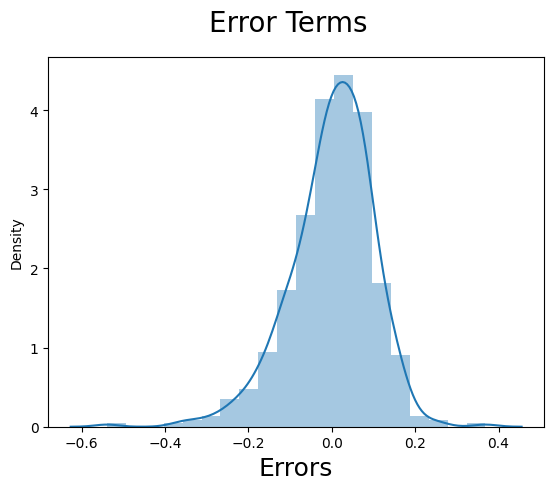

In [3265]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred_top_bottom), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Error terms seem to be approximately normally distributed with mean zero, so the assumption on the linear modeling seems to be fulfilled.

#### Plot between residuals and predictions

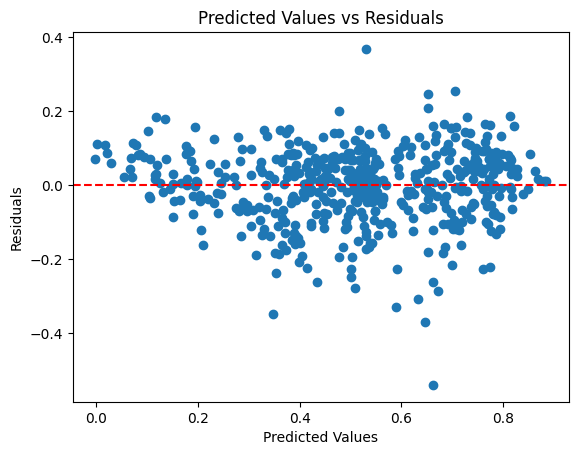

In [3266]:
plt.scatter(y_train_pred_top_bottom, (y_train - y_train_pred_top_bottom))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.show()
plt.show()

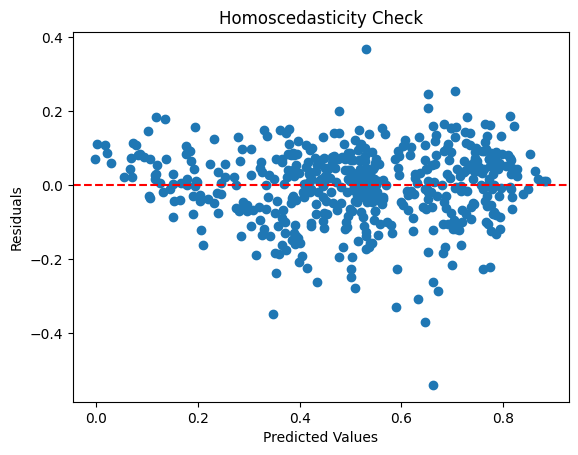

In [3267]:
plt.scatter(y_train_pred_top_bottom, (y_train - y_train_pred_top_bottom))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.show()
plt.show()

### See almost a constant variance

# Making Predictions

In [3268]:
test_numerical = list(set(data.select_dtypes(include=['float64']).columns))
test_numerical

['temp', 'hum', 'windspeed', 'cnt']

In [3269]:
df_test[test_numerical] = scaler.transform(df_test[test_numerical])
df_test.head()

temp       hum  windspeed       cnt  workingday_Yes  holiday_Yes  \
184  0.831783  0.657364   0.084219  0.692706               0            1   
535  0.901354  0.610133   0.153728  0.712034               1            0   
299  0.511964  0.837699   0.334206  0.303382               0            0   
221  0.881625  0.437098   0.339570  0.547400               1            0   
152  0.817246  0.314298   0.537414  0.569029               0            0   

     mnth_Aug  mnth_Dec  mnth_Feb  mnth_Jan  ...  season_spring  \
184         0         0         0         0  ...              0   
535         0         0         0         0  ...              0   
299         0         0         0         0  ...              0   
221         1         0         0         0  ...              0   
152         0         0         0         0  ...              0   

     season_summer  season_winter  weekday_Mon  weekday_Sat  weekday_Sun  \
184              0              0            0            0            0   
535              1              0            0            0            0   
299              0              1            0            1            0   
221              0              0            0            0            0   
152              1              0            0            1            0   

     weekday_Thu  weekday_Tue  weekday_Wed  yr_2019  
184            0            0            1        0  
535            1            0            0        1  
299            0            0            0        0  
221            0            0            0        0  
152            0            0            0        0  

[5 rows x 29 columns]

In [3270]:
y_test = df_test.pop('cnt')
X_test = df_test

In [3271]:
X_test_tb = X_test[X.columns]

# Adding a constant variable 
X_test_tb_sm = sm.add_constant(X_test_tb)

### lr_13 is the latest regression model with the columns removed and fit function called.

In [3272]:
y_pred_tb = lr_13.predict(X_test_tb_sm)

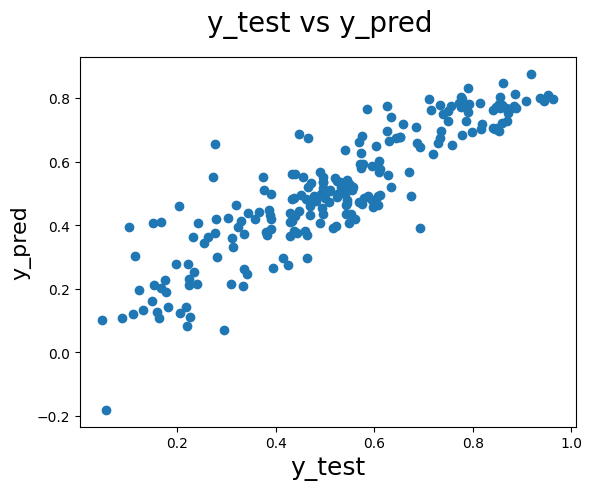

In [3273]:
fig = plt.figure()
plt.scatter(y_test,y_pred_tb)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

# R-squared score on the test set

In [3274]:
from sklearn.metrics import r2_score
print('R2 Score:', r2_score(y_test, y_pred_tb))

R2 Score: 0.7859103782455312


In [3275]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_tb))

Mean Squared Error: 0.01016835960181698


### The R2 score of train and test is close.
- Train - 0.799
- Test - 0.785

## The next option is to use RFE and manual work to find the best model

# Use RFE(Recursive feature elimination) to build models


In [3276]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Create train and test data

In [3277]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Import scaler

In [3278]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [3279]:
train_numerical = list(set(data.select_dtypes(include=['float64']).columns))
train_numerical

['temp', 'hum', 'windspeed', 'cnt']

In [3280]:
df_train[train_numerical] = scaler.fit_transform(df_train[train_numerical])
df_train.head()

temp       hum  windspeed       cnt  workingday_Yes  holiday_Yes  \
653  0.509887  0.575354   0.300794  0.864243               1            0   
576  0.815169  0.725633   0.264686  0.827658               1            0   
426  0.442393  0.640189   0.255342  0.465255               0            0   
728  0.245101  0.498067   0.663106  0.204096               1            0   
482  0.395666  0.504508   0.188475  0.482973               0            0   

     mnth_Aug  mnth_Dec  mnth_Feb  mnth_Jan  ...  season_spring  \
653         0         0         0         0  ...              0   
576         0         0         0         0  ...              0   
426         0         0         0         0  ...              1   
728         0         1         0         0  ...              1   
482         0         0         0         0  ...              0   

     season_summer  season_winter  weekday_Mon  weekday_Sat  weekday_Sun  \
653              0              1            0            0            0   
576              0              0            0            0            0   
426              0              0            0            0            1   
728              0              0            1            0            0   
482              1              0            0            0            1   

     weekday_Thu  weekday_Tue  weekday_Wed  yr_2019  
653            0            0            1        1  
576            0            0            1        1  
426            0            0            0        1  
728            0            0            0        1  
482            0            0            0        1  

[5 rows x 29 columns]

### Create X and Y train

In [3281]:
y_train = df_train.pop('cnt')
X_train = df_train

In [3282]:
X_train.head()

temp       hum  windspeed  workingday_Yes  holiday_Yes  mnth_Aug  \
653  0.509887  0.575354   0.300794               1            0         0   
576  0.815169  0.725633   0.264686               1            0         0   
426  0.442393  0.640189   0.255342               0            0         0   
728  0.245101  0.498067   0.663106               1            0         0   
482  0.395666  0.504508   0.188475               0            0         0   

     mnth_Dec  mnth_Feb  mnth_Jan  mnth_Jul  ...  season_spring  \
653         0         0         0         0  ...              0   
576         0         0         0         1  ...              0   
426         0         0         0         0  ...              1   
728         1         0         0         0  ...              1   
482         0         0         0         0  ...              0   

     season_summer  season_winter  weekday_Mon  weekday_Sat  weekday_Sun  \
653              0              1            0            0            0   
576              0              0            0            0            0   
426              0              0            0            0            1   
728              0              0            1            0            0   
482              1              0            0            0            1   

     weekday_Thu  weekday_Tue  weekday_Wed  yr_2019  
653            0            0            1        1  
576            0            0            1        1  
426            0            0            0        1  
728            0            0            0        1  
482            0            0            0        1  

[5 rows x 28 columns]

In [3283]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

#### We will select 20 columns from 28 and use RFE to get features.

In [3284]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=20)             #Selecting 20 columns out of 28
rfe = rfe.fit(X_train, y_train)

In [3285]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('workingday_Yes', True, 1),
 ('holiday_Yes', True, 1),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 8),
 ('mnth_Mar', False, 9),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 6),
 ('mnth_Sep', True, 1),
 ('weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  True,
  1),
 ('weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
  True,
  1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weekday_Mon', False, 3),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 7),
 ('weekday_Tue', False, 2),
 ('weekday_Wed', False, 5),
 ('yr_2019', True, 1)]

#### The RFE support true and RFE rank 1 is selected to create the model

In [3286]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'workingday_Yes', 'holiday_Yes', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'season_spring', 'season_summer', 'season_winter', 'weekday_Sat',
       'weekday_Sun', 'yr_2019'],
      dtype='object')

#### The below columns have rfe_support false and rank greater than 1

In [3287]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_Oct', 'weekday_Mon',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [3288]:
X_train_rfe = X_train[col]

In [3289]:
import statsmodels.api as sm  
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [3290]:
lm = sm.OLS(y_train,X_train_rfe_sm).fit()

In [3291]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.9
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          9.48e-186
Time:                        21:59:03   Log-Likelihood:                 519.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     489   BIC:                            -908.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [3292]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                                      workingday_Yes  48.84
1                                                 hum  38.65
0                                                temp  29.21
18                                        weekday_Sun   9.80
17                                        weekday_Sat   9.41
14                                      season_spring   7.09
2                                           windspeed   5.47
16                                      season_winter   4.92
15                                      season_summer   4.30
7                                            mnth_Jan   2.55
13  weathersit_Mist + Cloudy, Mist + Broken clouds...   2.41
4                                         holiday_Yes   2.38
19                                            yr_2019   2.11
10                                           mnth_Nov   2.00
6                                            mnth_Feb   1.98
5                                            mnth_Dec   1.77
9                                            mnth_May   1.63
8                                            mnth_Jul   1.61
11                                           mnth_Sep   1.44
12  weathersit_Light Snow, Light Rain + Thundersto...   1.31

#### Dropping the columns due to p value greater that 0.05
1. weekday_Sun - 0.624
2. weekday_Sat - 0.564
3. season_summer - 0.116
4. mnth_May - 0.157
5. mnth_Feb - 0.085
6. workingday_Yes - 0.421

In [3293]:
X_train_new = X_train_rfe.drop(["weekday_Sun", "weekday_Sat", "season_summer", "mnth_May", "mnth_Feb","workingday_Yes"], axis = 1)

In [3294]:
X_train_new_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new_sm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          7.80e-189
Time:                        21:59:03   Log-Likelihood:                 511.10
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     495   BIC:                            -928.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [3295]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                                                 hum  24.57
0                                                temp  16.83
2                                           windspeed   4.07
12                                      season_winter   2.97
11                                      season_spring   2.94
10  weathersit_Mist + Cloudy, Mist + Broken clouds...   2.26
13                                            yr_2019   2.07
7                                            mnth_Nov   1.82
5                                            mnth_Jan   1.74
4                                            mnth_Dec   1.54
6                                            mnth_Jul   1.42
9   weathersit_Light Snow, Light Rain + Thundersto...   1.24
8                                            mnth_Sep   1.22
3                                         holiday_Yes   1.06

In [3296]:
X_train_new = X_train_new.drop(["hum", "temp"], axis = 1)

In [3297]:
X_train_new_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new_sm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     154.1
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          7.86e-159
Time:                        21:59:03   Log-Likelihood:                 434.31
No. Observations:                 510   AIC:                            -842.6
Df Residuals:                     497   BIC:                            -787.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [3298]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                           windspeed  2.63
10                                      season_winter  2.52
9                                       season_spring  2.30
5                                            mnth_Nov  1.78
11                                            yr_2019  1.76
3                                            mnth_Jan  1.64
8   weathersit_Mist + Cloudy, Mist + Broken clouds...  1.46
2                                            mnth_Dec  1.45
6                                            mnth_Sep  1.12
4                                            mnth_Jul  1.10
7   weathersit_Light Snow, Light Rain + Thundersto...  1.09
1                                         holiday_Yes  1.06

In [3299]:
X_train_new = X_train_new.drop(["mnth_Jul", "season_winter"], axis = 1)
X_train_new_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new_sm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          5.82e-161
Time:                        21:59:03   Log-Likelihood:                 433.99
No. Observations:                 510   AIC:                            -846.0
Df Residuals:                     499   BIC:                            -799.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [3300]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                          windspeed  2.47
8                                      season_spring  2.09
9                                            yr_2019  1.72
3                                           mnth_Jan  1.62
7  weathersit_Mist + Cloudy, Mist + Broken clouds...  1.44
4                                           mnth_Nov  1.15
5                                           mnth_Sep  1.11
2                                           mnth_Dec  1.10
1                                        holiday_Yes  1.06
6  weathersit_Light Snow, Light Rain + Thundersto...  1.06

### The above model has all p values less than 0.05 and VIF less than 5. We can consider this a good model.
- R-squared:                       0.788
- Adj. R-squared:                  0.784

# Residual Analysis of the train data
#### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [3301]:
y_train_cnt = lm.predict(X_train_new_sm)

Text(0.5, 0, 'Errors')

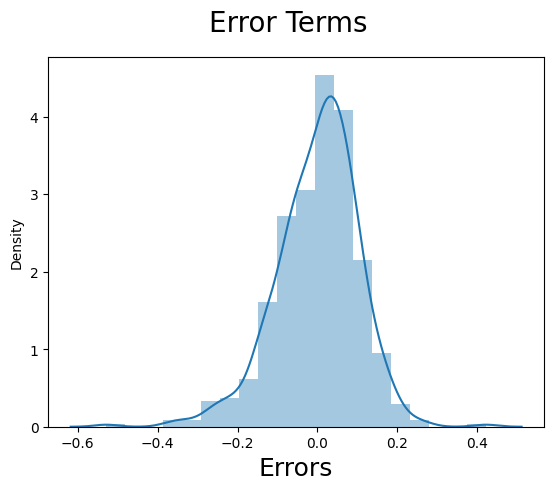

In [3302]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

## Error terms seem to be approximately normally distributed with mean zero, so the assumption on the linear modeling seems to be fulfilled.

#### Plot between residuals and predictions

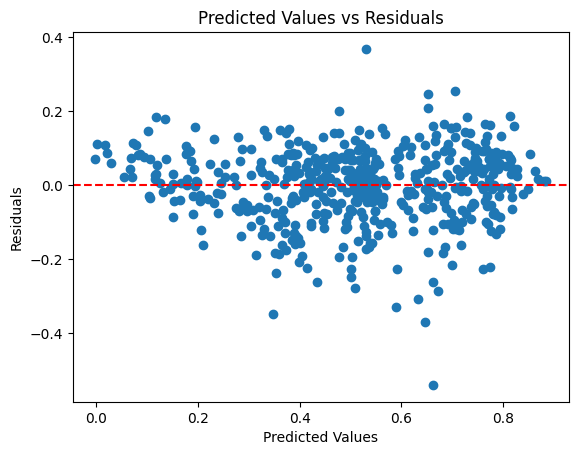

In [3303]:
plt.scatter(y_train_pred_top_bottom, (y_train - y_train_pred_top_bottom))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.show()
plt.show()

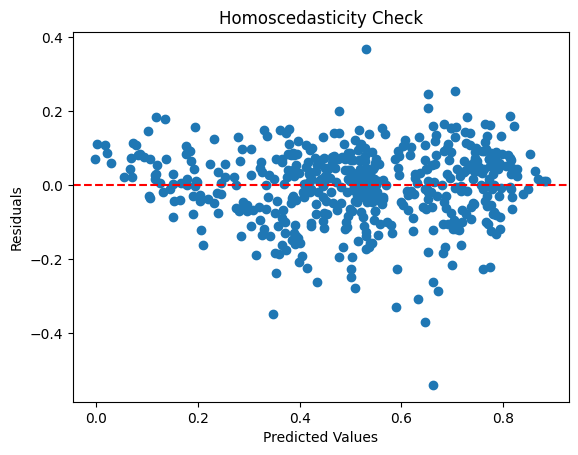

In [3304]:
plt.scatter(y_train_pred_top_bottom, (y_train - y_train_pred_top_bottom))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.show()
plt.show()

### See almost a constant variance

# Making Predictions

### Applying the scaling on the test sets

In [3305]:
test_numerical = list(set(data.select_dtypes(include=['float64']).columns))
test_numerical

['temp', 'hum', 'windspeed', 'cnt']

In [3306]:
df_test[test_numerical] = scaler.transform(df_test[test_numerical])
df_test.head()

temp       hum  windspeed       cnt  workingday_Yes  holiday_Yes  \
184  0.831783  0.657364   0.084219  0.692706               0            1   
535  0.901354  0.610133   0.153728  0.712034               1            0   
299  0.511964  0.837699   0.334206  0.303382               0            0   
221  0.881625  0.437098   0.339570  0.547400               1            0   
152  0.817246  0.314298   0.537414  0.569029               0            0   

     mnth_Aug  mnth_Dec  mnth_Feb  mnth_Jan  ...  season_spring  \
184         0         0         0         0  ...              0   
535         0         0         0         0  ...              0   
299         0         0         0         0  ...              0   
221         1         0         0         0  ...              0   
152         0         0         0         0  ...              0   

     season_summer  season_winter  weekday_Mon  weekday_Sat  weekday_Sun  \
184              0              0            0            0            0   
535              1              0            0            0            0   
299              0              1            0            1            0   
221              0              0            0            0            0   
152              1              0            0            1            0   

     weekday_Thu  weekday_Tue  weekday_Wed  yr_2019  
184            0            0            1        0  
535            1            0            0        1  
299            0            0            0        0  
221            0            0            0        0  
152            0            0            0        0  

[5 rows x 29 columns]

In [3307]:
df_test.describe()

temp         hum   windspeed         cnt  workingday_Yes  \
count  219.000000  219.000000  219.000000  219.000000      219.000000   
mean     0.558941    0.638508    0.313350    0.520592        0.639269   
std      0.233698    0.148974    0.159947    0.218435        0.481313   
min      0.046591    0.261915   -0.042808    0.048205        0.000000   
25%      0.354650    0.527265    0.198517    0.377531        0.000000   
50%      0.558691    0.627737    0.299459    0.524275        1.000000   
75%      0.759096    0.743928    0.403048    0.672745        1.000000   
max      0.984424    1.002146    0.807474    0.963300        1.000000   

       holiday_Yes    mnth_Aug    mnth_Dec    mnth_Feb    mnth_Jan  ...  \
count   219.000000  219.000000  219.000000  219.000000  219.000000  ...   
mean      0.036530    0.059361    0.086758    0.100457    0.077626  ...   
std       0.188034    0.236840    0.282125    0.301297    0.268194  ...   
min       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
50%       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
75%       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
max       1.000000    1.000000    1.000000    1.000000    1.000000  ...   

       season_spring  season_summer  season_winter  weekday_Mon  weekday_Sat  \
count     219.000000     219.000000     219.000000   219.000000   219.000000   
mean        0.255708       0.264840       0.232877     0.118721     0.173516   
std         0.437258       0.442259       0.423633     0.324202     0.379560   
min         0.000000       0.000000       0.000000     0.000000     0.000000   
25%         0.000000       0.000000       0.000000     0.000000     0.000000   
50%         0.000000       0.000000       0.000000     0.000000     0.000000   
75%         1.000000       1.000000       0.000000     0.000000     0.000000   
max         1.000000       1.000000       1.000000     1.000000     1.000000   

       weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed     yr_2019  
count   219.000000   219.000000   219.000000   219.000000  219.000000  
mean      0.155251     0.141553     0.123288     0.155251    0.479452  
std       0.362974     0.349389     0.329520     0.362974    0.500722  
min       0.000000     0.000000     0.000000     0.000000    0.000000  
25%       0.000000     0.000000     0.000000     0.000000    0.000000  
50%       0.000000     0.000000     0.000000     0.000000    0.000000  
75%       0.000000     0.000000     0.000000     0.000000    1.000000  
max       1.000000     1.000000     1.000000     1.000000    1.000000  

[8 rows x 29 columns]

### Dividing into X_test and y_test

In [3308]:
y_test = df_test.pop('cnt')
X_test = df_test

In [3309]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_sm = sm.add_constant(X_test_new)

## `lm` is the predictor function here

In [3310]:
y_pred = lm.predict(X_test_new_sm)

## Model Evaluation

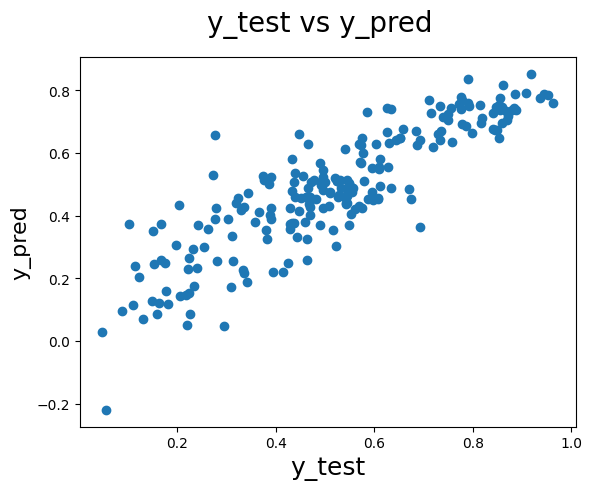

In [3311]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

# R-squared score on the test set

In [3312]:
from sklearn.metrics import r2_score
print('R2 Score:', r2_score(y_test, y_pred))

R2 Score: 0.742990171535178


### The R2 score of train and test is close.
- Train - 0.788
- Test - 0.742

In [3313]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.012206889505502421
